# Spotify playlist creation using Clustering (K-Means)

In [224]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd

## first step: Randomly choosing the K centroids for the initial clusters from the dataset.

In [2]:
def kMeans_init_centroids(X, K):
    rand_idx = np.random.permutation(X.shape[0])
    init_centroids = X[rand_idx[:K]]
    return np.array(init_centroids)

## Second step: Assigning each data point to their nearest centroid.

In [3]:
def assigning_points_to_centroids(x,centroids):
    m,n = x.shape
    k = centroids.shape[0]
    index = []
    for i in range(m):
        distance = []
        for j in range(k):
            distance.append(np.linalg.norm(x[i]-centroids[j]))
        index.append(np.argmin(distance))
    return np.array(index)

## Third step: Updating centroid locations based on the locations of the data points

In [4]:
def recomputing_centroids(x,index,k):
    n = x.shape[1]
    new_centroids = []
    for j in range(k):
        points_related_to_cluster_j = x[index == j]
        new_centroids.append(np.mean(points_related_to_cluster_j, axis = 0)) 
    return np.array(new_centroids)

## Fourth step: Running the algorithm(repeting [fist & second] step n times )

In [5]:
def run_kMeans(X, initial_centroids, max_iters):
    k = initial_centroids.shape[0]
    z = initial_centroids
    for i in range(max_iters):
        indx = assigning_points_to_centroids(X, z)
        centroids = recomputing_centroids(X,indx,k)
        z = centroids
        if i%5 == 0:
            print('iteration{}/{} ====>{} \n'.format(i,max_iters,list(z)))
    return np.array(centroids),np.array(indx)

## Fifth step: Loading Manipulating and Preprocessing Data

In [6]:
#loading data set
data = pd.read_csv(r"C:\Users\purna\Desktop\Projects\Spotify Songs Clustering based on Audio Features\Data Sets\SpotifyFeatures.csv")

In [7]:
data.head(20)

genre           artist_name  \
0   Movie        Henri Salvador   
1   Movie     Martin & les fées   
2   Movie       Joseph Williams   
3   Movie        Henri Salvador   
4   Movie          Fabien Nataf   
5   Movie        Henri Salvador   
6   Movie     Martin & les fées   
7   Movie           Laura Mayne   
8   Movie                Chorus   
9   Movie   Le Club des Juniors   
10  Movie     Leopold Stokowski   
11  Movie          Randy Newman   
12  Movie  Idoles De La Musique   
13  Movie                Chorus   
14  Movie    Richard M. Sherman   
15  Movie           Michel Roux   
16  Movie    Jean Claude Corbel   
17  Movie         Bernard Minet   
18  Movie        Henri Salvador   
19  Movie                Amalya   

                                           track_name                track_id  \
0                         C'est beau de faire un Show  0BRjO6ga9RKCKjfDqeFgWV   
1                    Perdu d'avance (par Gad Elmaleh)  0BjC1NfoEOOusryehmNudP   
2                      Don't Let Me Be Lonely Tonight  0CoSDzoNIKCRs124s9uTVy   
3                      Dis-moi Monsieur Gordon Cooper  0Gc6TVm52BwZD07Ki6tIvf   
4                                           Ouverture  0IuslXpMROHdEPvSl1fTQK   
5                      Le petit souper aux chandelles  0Mf1jKa8eNAf1a4PwTbizj   
6   Premières recherches (par Paul Ventimila, Lori...  0NUiKYRd6jt1LKMYGkUdnZ   
7                                       Let Me Let Go  0PbIF9YVD505GutwotpB5C   
8                                               Helka  0ST6uPfvaPpJLtQwhE6KfC   
9                           Les bisous des bisounours  0VSqZ3KStsjcfERGdcWpFO   
10  Symphony No.4 In E Minor Op.98 : IV. Allegro E...  0XKgegoxLcIihK3Klpfo3N   
11  The Hanging (Maverick - Original Motion Pictur...  0hprxsuRM5vVCOfaM7l3gQ   
12                             J'ai demandé à la lune  0jF6HUm18fg6QQCLHhfhC0   
13                                      Mangala Aarti  0jIY0oRAp1T4mezDyEhOad   
14                                       Keys of Love  0pXwl2CRP5awxHsF9eET3L   
15       Les aventures d'Arsène Lupin: 813 - Partie 6  0uWUjxM7oDPKpb3T2y3oZm   
16                                              Diane  0vS7Zid3q0dMyX8uMnlQ8s   
17                                       Ultra Man 80  0x8xSaoSfQkOYUnG1nbga0   
18                                            Veunise  113pHPsGwyeklEjLhnB3ZT   
19                               Ladies And Gentlemen  12ZjoNweObu1k9rK4SOSdL   

    popularity  acousticness  danceability  duration_ms  energy  \
0            0       0.61100         0.389        99373  0.9100   
1            1       0.24600         0.590       137373  0.7370   
2            3       0.95200         0.663       170267  0.1310   
3            0       0.70300         0.240       152427  0.3260   
4            4       0.95000         0.331        82625  0.2250   
5            0       0.74900         0.578       160627  0.0948   
6            2       0.34400         0.703       212293  0.2700   
7           15       0.93900         0.416       240067  0.2690   
8            0       0.00104         0.734       226200  0.4810   
9           10       0.31900         0.598       152694  0.7050   
10           0       0.92100         0.191       566960  0.1450   
11           2       0.03830         0.230       121333  0.1330   
12           4       0.21500         0.680       213589  0.6000   
13           3       0.95800         0.758       308627  0.2640   
14           0       0.97000         0.400       159253  0.1740   
15           0       0.54800         0.588      2447870  0.4050   
16           0       0.70000         0.625       523424  0.2370   
17           3       0.48800         0.744       178107  0.9530   
18           1       0.38100         0.451       194360  0.4910   
19           4       0.16100         0.522       207240  0.7480   

    instrumentalness key  liveness  loudness   mode  speechiness    tempo  \
0           0.000000  C#    0.3460    -1.828  Major       0.0525  166.969   
1   

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [9]:
data.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

In [10]:
data.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

## Frequency distribution for some features

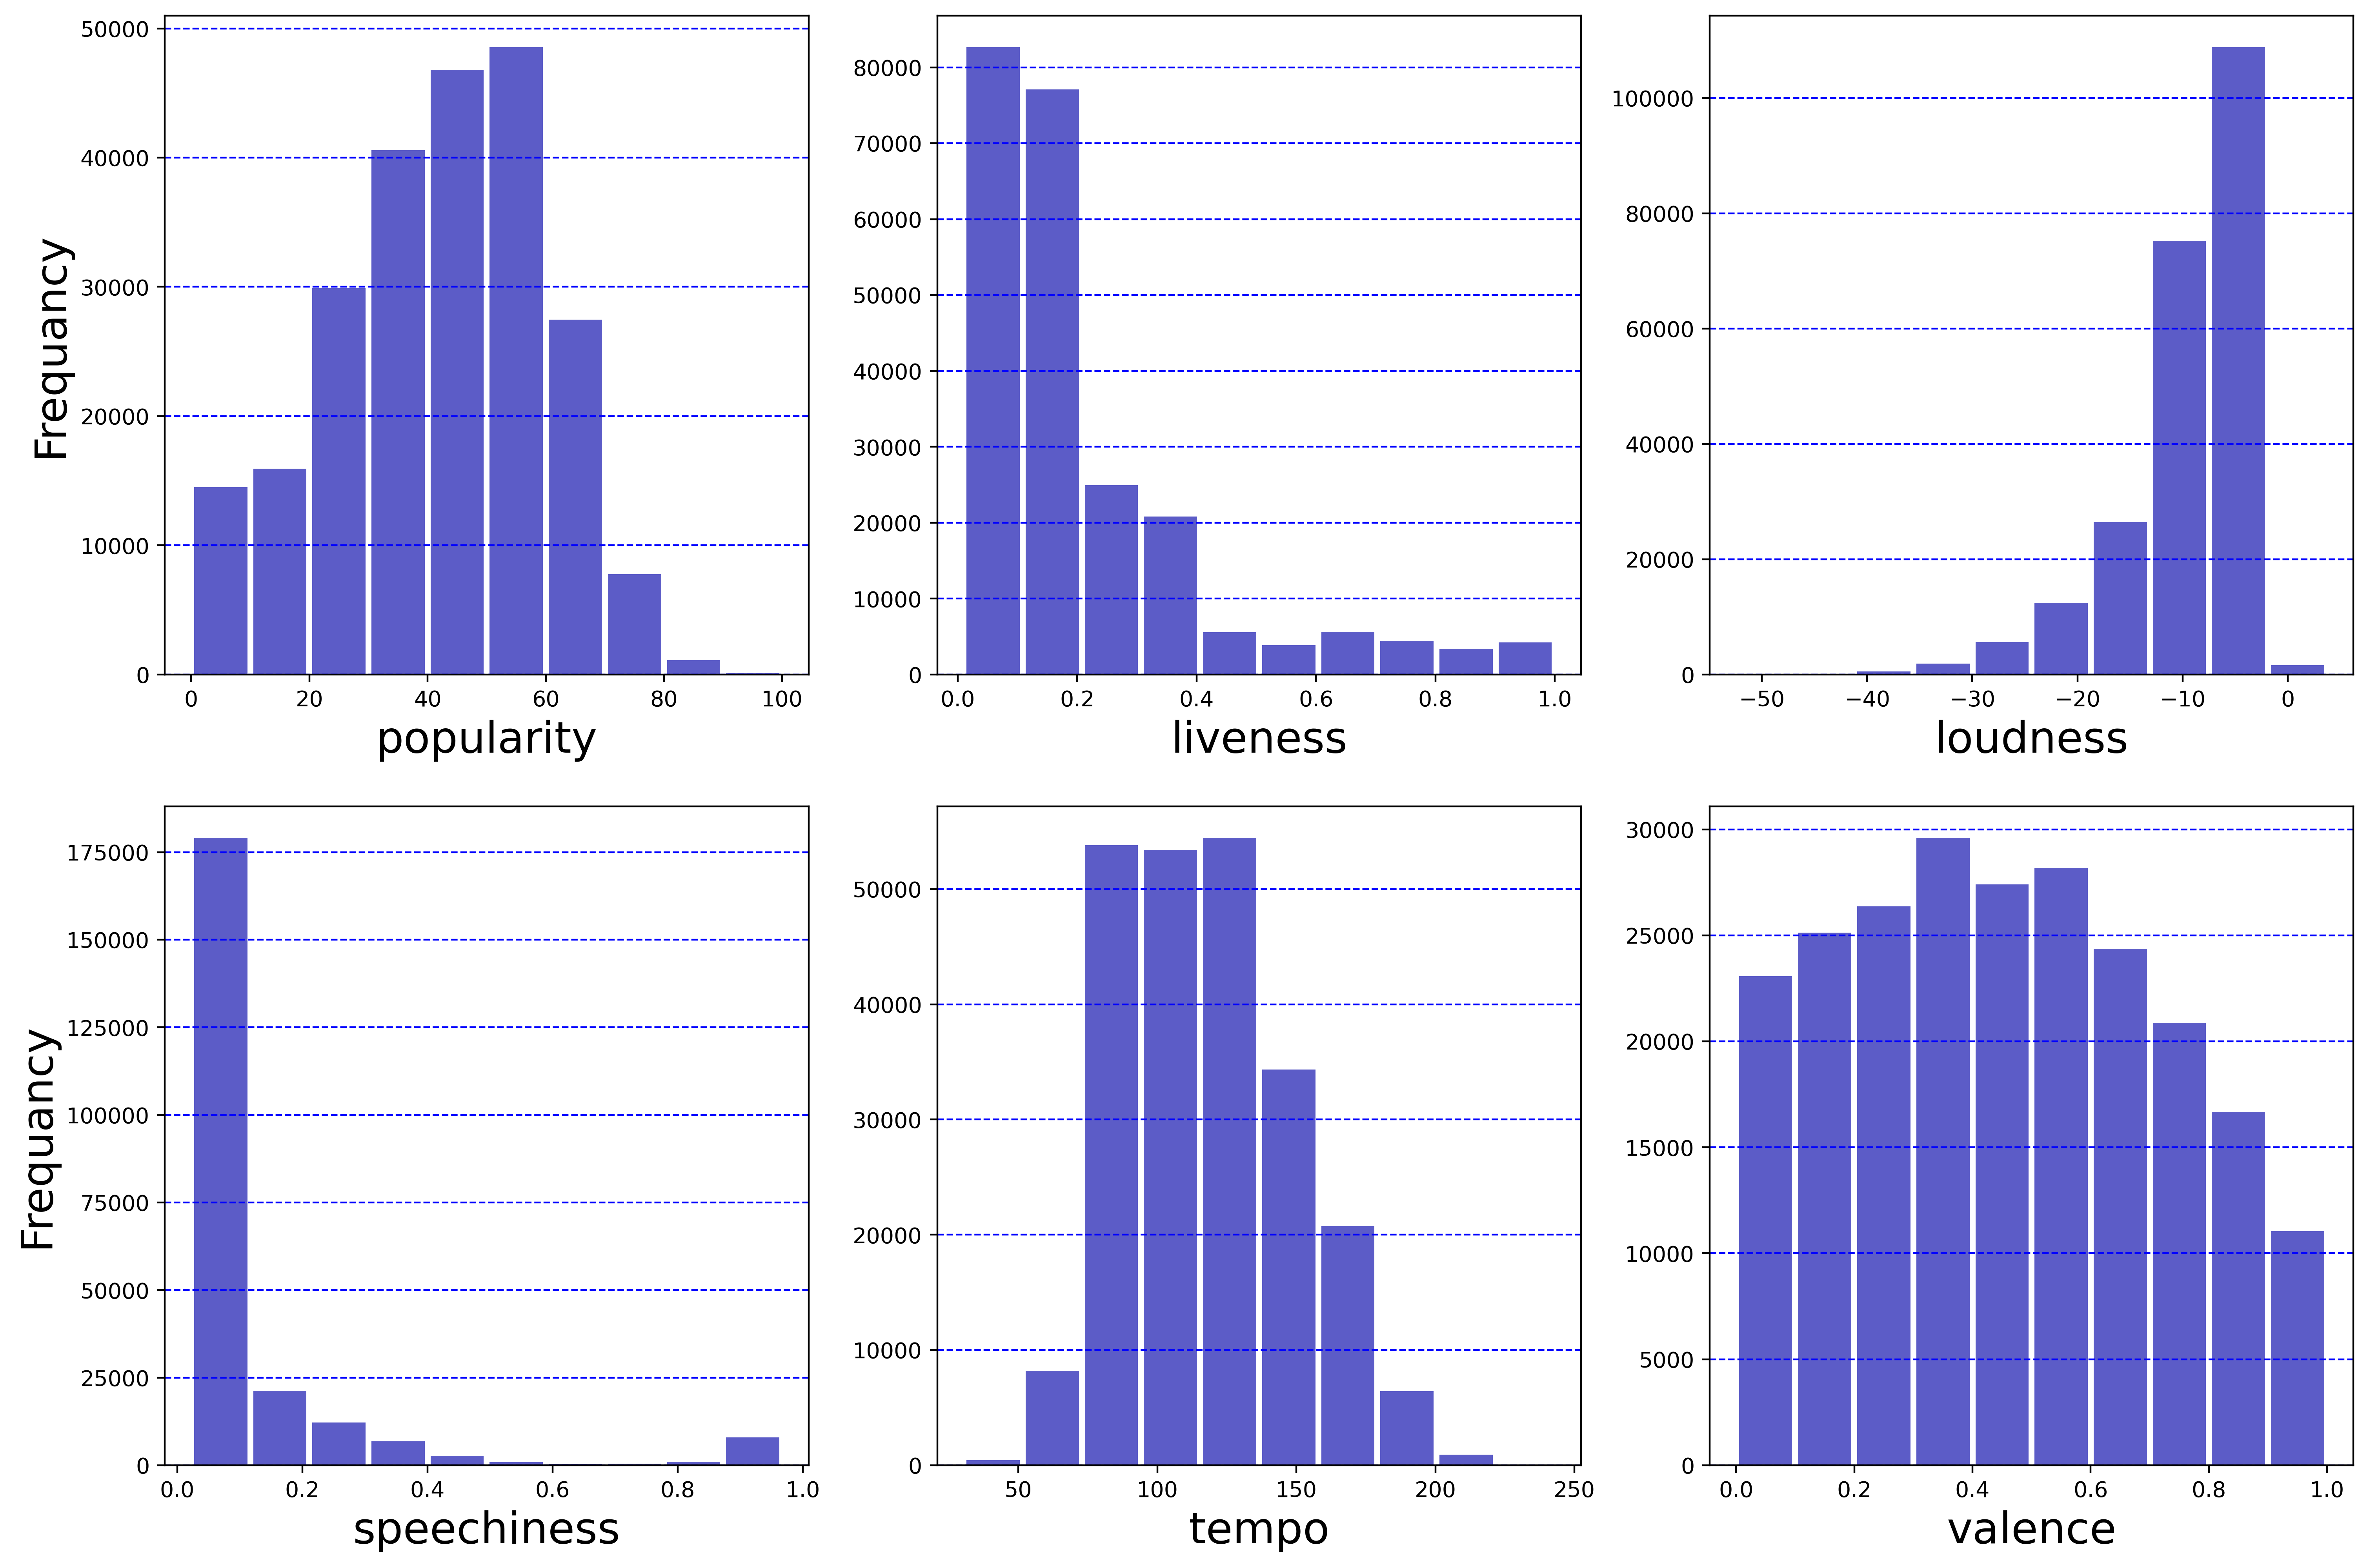

In [11]:
features =  ['popularity', 'liveness', 'loudness','speechiness','tempo', 'valence']
l = len(features)
plt.figure(figsize=(18,12),dpi = 400)
for i in range (l):
    plt.subplot(2,3,i+1)
    plt.hist(data[features[i]],color='#0504aa',alpha = 0.65,rwidth=0.9)
    plt.xlabel(features[i],size = 20)
    if i == 0 or i == 3:
        plt.ylabel("Frequancy",size = 20)
        
    plt.xticks()
    plt.yticks()
    plt.grid(axis = "y" , linestyle = "--",color = "b")

In [12]:
# Grouping data by gener then count track_id in each group
df0 = pd.DataFrame(data.groupby(data["genre"]).count()["track_id"]).reset_index()
#sorting values in
df0 = df0.sort_values(by="track_id",ascending=False)

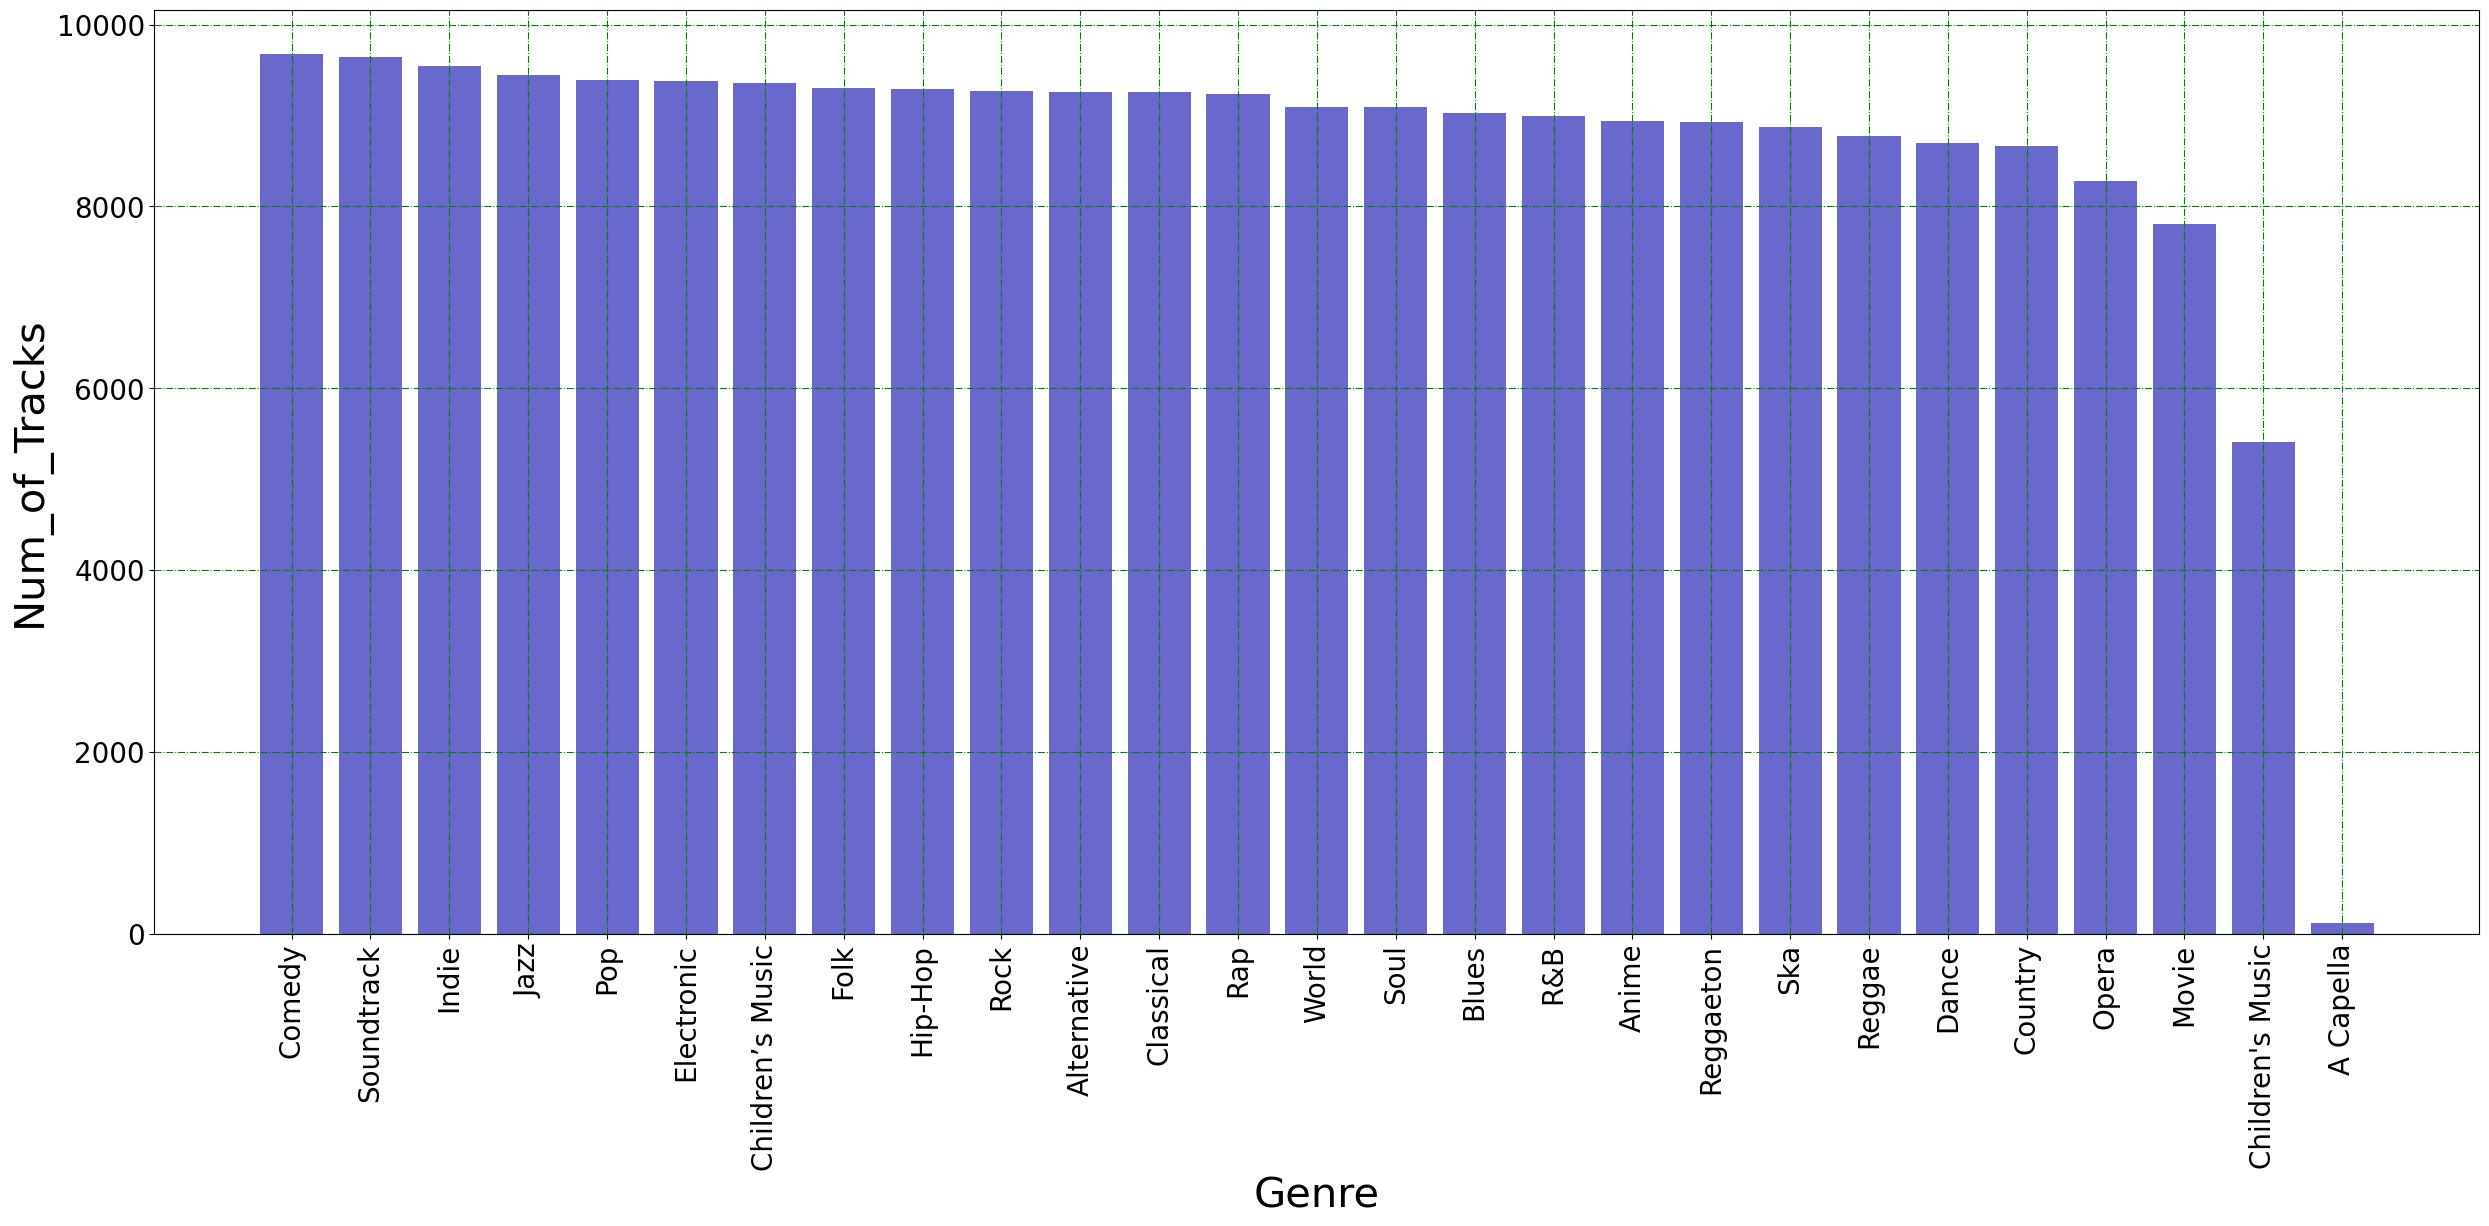

In [13]:
# Plotting no.of tracks in each category
plt.figure(figsize= (30,12))
plt.bar(df0["genre"],df0["track_id"],color = '#0504aa',alpha = 0.6)
plt.xlabel("Genre",size = 30)
plt.ylabel("Num_of_Tracks",size = 30)
plt.xticks(size = 20,rotation='vertical')
plt.yticks(size = 20)
plt.grid(linestyle = '-.',c = "g")
plt.show()

In [14]:
df1 = data.drop(columns=['genre', 'artist_name', 'track_name', 'track_id', 'key', "time_signature"])
df1

popularity  acousticness  danceability  duration_ms  energy  \
0                0       0.61100         0.389        99373   0.910   
1                1       0.24600         0.590       137373   0.737   
2                3       0.95200         0.663       170267   0.131   
3                0       0.70300         0.240       152427   0.326   
4                4       0.95000         0.331        82625   0.225   
...            ...           ...           ...          ...     ...   
232720          39       0.00384         0.687       326240   0.714   
232721          38       0.03290         0.785       282447   0.683   
232722          47       0.90100         0.517       166960   0.419   
232723          44       0.26200         0.745       222442   0.704   
232724          35       0.09730         0.758       323027   0.470   

        instrumentalness  liveness  loudness   mode  speechiness    tempo  \
0               0.000000    0.3460    -1.828  Major       0.0525  166.969   
1               0.000000    0.1510    -5.559  Minor       0.0868  174.003   
2               0.000000    0.1030   -13.879  Minor       0.0362   99.488   
3               0.000000    0.0985   -12.178  Major       0.0395  171.758   
4               0.123000    0.2020   -21.150  Major       0.0456  140.576   
...                  ...       ...       ...    ...          ...      ...   
232720          0.544000    0.0845   -10.626  Major       0.0316  115.542   
232721          0.000880    0.2370    -6.944  Minor       0.0337  113.830   
232722          0.000000    0.0945    -8.282  Major       0.1480   84.135   
232723          0.000000    0.3330    -7.137  Major       0.1460  100.031   
232724          0.000049    0.0836    -6.708  Minor       0.0287  113.897   

        valence  
0         0.814  
1         0.816  
2         0.368  
3         0.227  
4         0.390  
...         ...  
232720    0.962  
232721    0.969  
232722    0.813  
232723    0.489  
232724    0.479  

[232725 rows x 12 columns]

In [15]:
#data preprocessing 
df1.loc[df1["mode"] == "Major" ,"mode"] = 1
df1.loc[df1["mode"] == "Minor" ,"mode"] = 0
x = np.array(df1)

In [16]:
#scaling features 
df1["popularity"] = df1["popularity"] / max(df1["popularity"])
df1["duration_ms"] = df1["duration_ms"] /max(df1["duration_ms"])
df1["tempo"] = df1["tempo"] /max(df1["tempo"])
df1["loudness"] = df1["loudness"] /max(df1["loudness"])

## Choosing the proper number of clusters using elbow method

In [17]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, n_init=10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


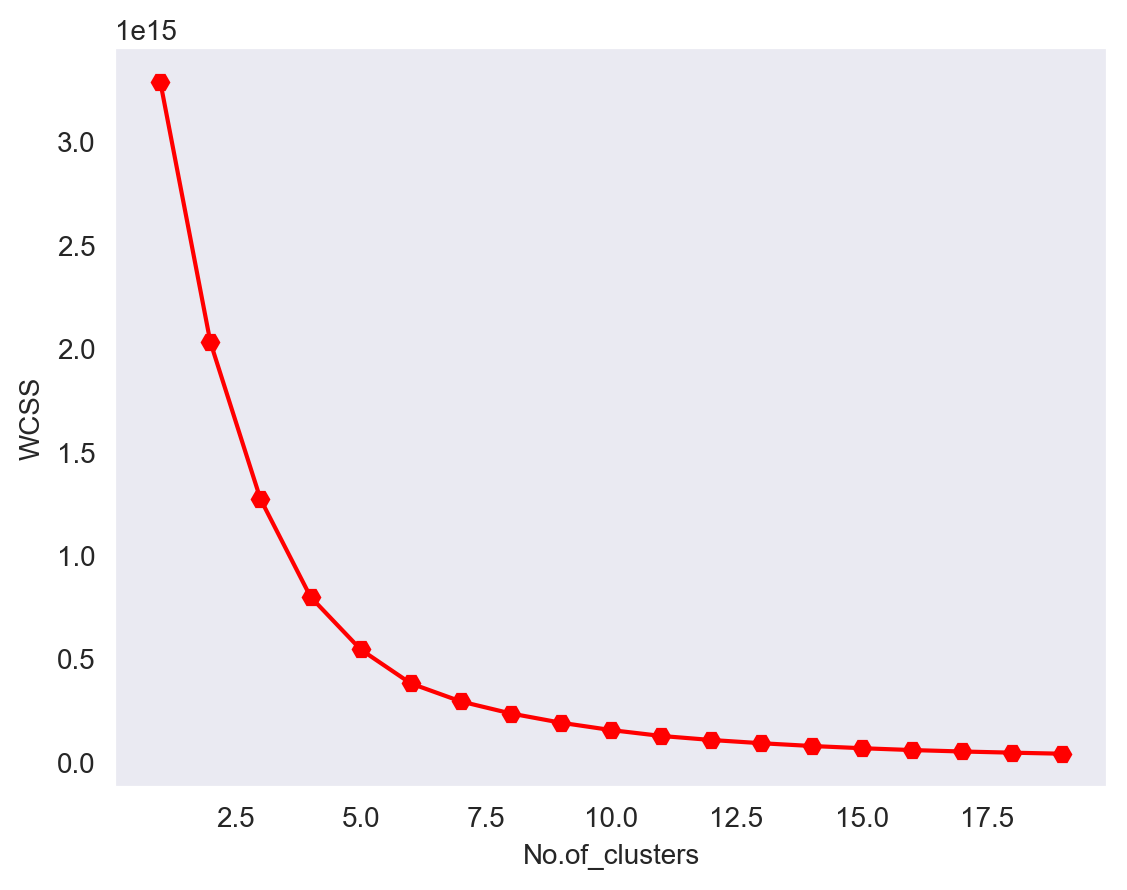

In [253]:
plt.figure(dpi = 200)
plt.plot(np.arange(1,20),wcss,marker = "H",color = "r")
plt.xlabel("No.of_clusters")
plt.ylabel("WCSS")

plt.grid()
plt.show()

In [19]:
initial_centroids = kMeans_init_centroids(x, 10)
print('initial centroids ====>\n{} \n'.format(initial_centroids))

initial centroids ====>
[[41 0.13 0.748 295200 0.46 0.896 0.275 -6.991 1 0.128 94.488 0.853]
 [68 0.088 0.722 230713 0.329 0.0 0.081 -11.617 0 0.108 99.991 0.166]
 [36 0.0138 0.491 253760 0.921 0.0 0.993 -4.561 1 0.0783 116.022 0.156]
 [48 0.925 0.513 282560 0.292 0.82 0.0824 -18.232 0 0.0579 97.087 0.566]
 [57 0.156 0.659 187720 0.906 3.27e-06 0.105 -3.906 0 0.0428 94.997 0.792]
 [28 0.5 0.715 228107 0.665 0.0 0.109 -8.113 1 0.0419 98.176 0.922]
 [68 0.52 0.666 193561 0.715 0.0 0.465 -5.311 0 0.0374 115.874 0.736]
 [65 0.00106 0.576 456480 0.953 0.49 0.474 -8.968 1 0.0362 140.042 0.303]
 [0 0.985 0.11 253587 0.023 0.893 0.183 -26.415 0 0.0428 208.13 0.122]
 [14 0.865 0.467 186503 0.475 0.0 0.957 -17.326 1 0.941 84.675 0.413]] 



## Running the Algorithm

after running the algoritm we will get the final centroides and an index for each example in input dataset which refers to the cluster to which this example belong.

In [20]:
centroids,idx = run_kMeans(x, initial_centroids,21)

iteration0/21 ====>[array([40.12544975703847, 0.3764146611480402, 0.5142020586817039,
       321857.5305463853, 0.5511895739827141, 0.1945662696134876,
       0.22573387736933773, -10.195695611855069, 0.6377091138395341,
       0.10910035238695887, 116.80359846433511, 0.3897978522942224],
      dtype=object), array([45.523224714808144, 0.28203249602969094, 0.5805901915834282,
       235668.32154358388, 0.6252342776049333, 0.08888466965667853,
       0.1990980623328422, -8.014875279733674, 0.6394847442825173,
       0.10303714316904102, 119.91779946509527, 0.46911124938594995],
      dtype=object), array([43.652627915071356, 0.30600129140967697, 0.5617948277062291,
       260580.96742081447, 0.6016697977027514, 0.1106542526627221,
       0.20239828054298947, -8.554168395405497, 0.6469195962408633,
       0.10303257222415596, 118.48641065088711, 0.4428275948485911],
      dtype=object), array([42.97630680677331, 0.32776619814403396, 0.5518797068469316,
       277917.22200655914, 0.586843

___

## Creating playlists based on output indexes generated by K_Mean Algorithm

In [21]:
Cluster_No_i = []
for i in range(10):
    x = pd.DataFrame(data.iloc[idx == i ] )
    y = x.drop(columns=['popularity','acousticness', 'danceability', 'duration_ms', 'energy','instrumentalness',
                       'liveness', 'loudness','speechiness', 'tempo', 'valence'])
    Cluster_No_i.append(y)

## Generated playlists

This Playlist contains songs with high popularity :

In [254]:
Cluster_No_i[0]

genre         artist_name  \
78      Movie  Jean Claude Corbel   
283     Movie   Leopold Stokowski   
342     Movie   Leopold Stokowski   
376     Movie           Jean Davy   
424     Movie  Jean Claude Corbel   
...       ...                 ...   
228817   Soul           Fela Kuti   
229356   Soul           Fela Kuti   
231003   Soul     Luther Vandross   
231418   Soul           Fela Kuti   
231530   Soul           Fela Kuti   

                                               track_name  \
78                                   Le voyage à Lilliput   
283     Symphony No. 6 in B minor, Op. 74 'Pathétique'...   
342     Tristan und Isolde (Love Music from Acts II & ...   
376                                      C'est ça l'amour   
424                               Le voyage à Brobdingnag   
...                                                   ...   
228817                                             Zombie   
229356                                     Expensive Shit   
231003                                             Medley   
231418                                               Lady   
231530                                          Gentleman   

                      track_id key   mode time_signature  
78      2nM2RKLUqdVJYakMbaWBHC   C  Minor            3/4  
283     4etaqrzd6gYTaPna0Z2HFl   G  Major            4/4  
342     73ulytYi8ArzDYj4bjEHwN   B  Major            4/4  
376     0OluqaGVEHzB06KMfUkAWE  A#  Major            4/4  
424     2Opw2i7w5wxUPfWA0iTwgc   F  Major            4/4  
...                        ...  ..    ...            ...  
228817  11GDQVqIEKAB4QKOcIVOvG   D  Minor            4/4  
229356  2g72QoX5ZZlEqQpKfnOdrj   G  Minor            4/4  
231003  3pAiTAdDCvqWECwRmUlxvi  F#  Major            4/4  
231418  6fsLjItlUmbpl16SGi2COD  A#  Minor            4/4  
231530  1HC6o3lTQvNmtH3ejYG4hs  A#  Minor            4/4  

[1136 rows x 7 columns]

___

This Playlist contains songs with high danceability :

In [256]:
Cluster_No_i[2]

genre                     artist_name  \
44      Movie                        Ken Page   
87      Movie                          Chorus   
89      Movie                          Chorus   
102     Movie                         Choeurs   
108     Movie               Leopold Stokowski   
...       ...                             ...   
232680   Soul  Harold Melvin & The Blue Notes   
232685   Soul               Peggy Scott-Adams   
232693   Soul                     Erykah Badu   
232720   Soul                           Slave   
232724   Soul                  Mint Condition   

                                           track_name                track_id  \
44                                  Dancing with Gene  1qCTyNzxGkFXnvdrqT5olw   
87                                        Banga Aamar  35W7MQyH36gNt3EoR0qZdV   
89                    Sai Parameshwar Sai Karuneshwar  3AnPOKKZV1NRhED24p9YeX   
102                      Georges Bizet : Sur la place  3SGmQRE8io8waO8BqDufdT   
108     Symphony No.1 In C Major : IV. Allegro Vivace  3aX2M9VIuxxRIZ464VQwwc   
...                                               ...                     ...   
232680                                       Bad Luck  6VCj1ehtOIqOX9aTQlrD1O   
232685                                           Bill  0dVQeXMrjnNUqQOTQscgKe   
232693                                          Drama  1FAL6jmxa7oIZxmqZFZZL4   
232720                                   Son Of Slide  2XGLdVl7lGeq8ksM6Al7jT   
232724                 You Don't Have To Hurt No More  34XO9RwPMKjbvRry54QzWn   

       key   mode time_signature  
44       G  Major            3/4  
87       F  Major            3/4  
89      C#  Major            4/4  
102     A#  Major            4/4  
108     G#  Major            4/4  
...     ..    ...            ...  
232680   A  Major            4/4  
232685   D  Major            3/4  
232693   A  Minor            4/4  
232720   D  Major            4/4  
232724  G#  Minor            4/4  

[20490 rows x 7 columns]

---

This Playlist contains songs with high Energy :

In [257]:
Cluster_No_i[4]

genre          artist_name  \
1       Movie    Martin & les fées   
3       Movie       Henri Salvador   
9       Movie  Le Club des Juniors   
11      Movie         Randy Newman   
26      Movie       Henri Salvador   
...       ...                  ...   
232646   Soul       Gnarls Barkley   
232648   Soul         Leon Bridges   
232665   Soul        slenderbodies   
232705   Soul          Irma Thomas   
232719   Soul   Bobby "Blue" Bland   

                                               track_name  \
1                        Perdu d'avance (par Gad Elmaleh)   
3                          Dis-moi Monsieur Gordon Cooper   
9                               Les bisous des bisounours   
11      The Hanging (Maverick - Original Motion Pictur...   
26                                              Le Fêtard   
...                                                   ...   
232646                                         Who Cares?   
232648                     Better Man - Live at SXSW 2015   
232665                                  opal ocean, pt. 2   
232705                                  Ruler of My Heart   
232719             I'll Take Care Of You - Single Version   

                      track_id key   mode time_signature  
1       0BjC1NfoEOOusryehmNudP  F#  Minor            4/4  
3       0Gc6TVm52BwZD07Ki6tIvf  C#  Major            4/4  
9       0VSqZ3KStsjcfERGdcWpFO   G  Major            4/4  
11      0hprxsuRM5vVCOfaM7l3gQ   C  Major            4/4  
26      16hVzfu0IJZmP3Bj4x1BB1  G#  Major            4/4  
...                        ...  ..    ...            ...  
232646  7AdsGzEPnPWqpzA2qax2Z1  A#  Minor            4/4  
232648  7DJ73uz6ixmyRt6WGGFQQt   G  Major            4/4  
232665  3VibgNLxKcZy0Cepvg59SF   E  Minor            4/4  
232705  6xiiZYr0zysI7wbEQlbpei   B  Major            3/4  
232719  2iZf3EUedz9MPqbAvXdpdA  A#  Minor            4/4  

[21779 rows x 7 columns]

-------

This Playlist contains songs having high liveness :

In [258]:
Cluster_No_i[6]

genre         artist_name                      track_name  \
2       Movie     Joseph Williams  Don't Let Me Be Lonely Tonight   
5       Movie      Henri Salvador  Le petit souper aux chandelles   
14      Movie  Richard M. Sherman                    Keys of Love   
17      Movie       Bernard Minet                    Ultra Man 80   
21      Movie            Dorothée                  Clic clac cloc   
...       ...                 ...                             ...   
232691   Soul       Netherfriends  I Tweaked When I Saw Your Face   
232697   Soul               BAYNK                        Find You   
232704   Soul          Joss Stone            Put Your Hands On Me   
232710   Soul                 SiR                      The Canvas   
232722   Soul        Muddy Waters  (I'm Your) Hoochie Coochie Man   

                      track_id key   mode time_signature  
2       0CoSDzoNIKCRs124s9uTVy   C  Minor            5/4  
5       0Mf1jKa8eNAf1a4PwTbizj  C#  Major            4/4  
14      0pXwl2CRP5awxHsF9eET3L   G  Major            4/4  
17      0x8xSaoSfQkOYUnG1nbga0   E  Major            4/4  
21      148uA2Y78xfxDiCNjgZA0v   D  Major            4/4  
...                        ...  ..    ...            ...  
232691  1eLPPU4HycGct2kv66OI3s   C  Major            4/4  
232697  5lu9R9rCwIv080hpqJ6rny  C#  Minor            4/4  
232704  6v56CKz1ynaSYBAKYL88tC  G#  Major            4/4  
232710  4nrMpZVdy0wb13m2jNMJ3c   D  Minor            4/4  
232722  2ziWXUmQLrXTiYjCg2fZ2t   D  Major            4/4  

[37896 rows x 7 columns]

## So, in this way we can generate playlists based on different features of the songs

***

# Spotify Popularity Analytics 

In [97]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.simplefilter('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232725 entries, 9027 to 0
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    2327

In [99]:
print(data.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


In [100]:
data.describe()

popularity   acousticness   danceability   duration_ms  \
count  232725.000000  232725.000000  232725.000000  2.327250e+05   
mean       41.127502       0.368560       0.554364  2.351223e+05   
std        18.189948       0.354768       0.185608  1.189359e+05   
min         0.000000       0.000000       0.056900  1.538700e+04   
25%        29.000000       0.037600       0.435000  1.828570e+05   
50%        43.000000       0.232000       0.571000  2.204270e+05   
75%        55.000000       0.722000       0.692000  2.657680e+05   
max       100.000000       0.996000       0.989000  5.552917e+06   

              energy  instrumentalness       liveness       loudness  \
count  232725.000000     232725.000000  232725.000000  232725.000000   
mean        0.570958          0.148301       0.215009      -9.569885   
std         0.263456          0.302768       0.198273       5.998204   
min         0.000020          0.000000       0.009670     -52.457000   
25%         0.385000          0.000000       0.097400     -11.771000   
50%         0.605000          0.000044       0.128000      -7.762000   
75%         0.787000          0.035800       0.264000      -5.501000   
max         0.999000          0.999000       1.000000       3.744000   

         speechiness          tempo        valence  
count  232725.000000  232725.000000  232725.000000  
mean        0.120765     117.666585       0.454917  
std         0.185518      30.898907       0.260065  
min         0.022200      30.379000       0.000000  
25%         0.036700      92.959000       0.237000  
50%         0.050100     115.778000       0.444000  
75%         0.105000     139.054000       0.660000  
max         0.967000     242.903000       1.000000

I analyzed the data to get an idea of which variables were related to each other and to other variables.

In [101]:
data.corr()

popularity  acousticness  danceability  duration_ms  \
popularity          1.000000     -0.381295      0.256564     0.002348   
acousticness       -0.381295      1.000000     -0.364546     0.011203   
danceability        0.256564     -0.364546      1.000000    -0.125781   
duration_ms         0.002348      0.011203     -0.125781     1.000000   
energy              0.248922     -0.725576      0.325807    -0.030550   
instrumentalness   -0.210983      0.316154     -0.364941     0.076021   
liveness           -0.167995      0.069004     -0.041684     0.023783   
loudness            0.363011     -0.690202      0.438668    -0.047618   
speechiness        -0.151076      0.150935      0.134560    -0.016171   
tempo               0.081039     -0.238247      0.021939    -0.028456   
valence             0.060076     -0.325798      0.547154    -0.141811   

                    energy  instrumentalness  liveness  loudness  speechiness  \
popularity        0.248922         -0.210983 -0.167995  0.363011    -0.151076   
acousticness     -0.725576          0.316154  0.069004 -0.690202     0.150935   
danceability      0.325807         -0.364941 -0.041684  0.438668     0.134560   
duration_ms      -0.030550          0.076021  0.023783 -0.047618    -0.016171   
energy            1.000000         -0.378957  0.192801  0.816088     0.145120   
instrumentalness -0.378957          1.000000 -0.134198 -0.506320    -0.177147   
liveness          0.192801         -0.134198  1.000000  0.045686     0.510147   
loudness          0.816088         -0.506320  0.045686  1.000000    -0.002273   
speechiness       0.145120         -0.177147  0.510147 -0.002273     1.000000   
tempo             0.228774         -0.104133 -0.051355  0.228364    -0.081541   
valence           0.436771         -0.307522  0.011804  0.399901     0.023842   

                     tempo   valence  
popularity        0.081039  0.060076  
acousticness     -0.238247 -0.325798  
danceability      0.021939  0.547154  
duration_ms      -0.028456 -0.141811  
energy            0.228774  0.436771  
instrumentalness -0.104133 -0.307522  
liveness         -0.051355  0.011804  
loudness          0.228364  0.399901  
speechiness      -0.081541  0.023842  
tempo             1.000000  0.134857  
valence           0.134857  1.000000

<Axes: >

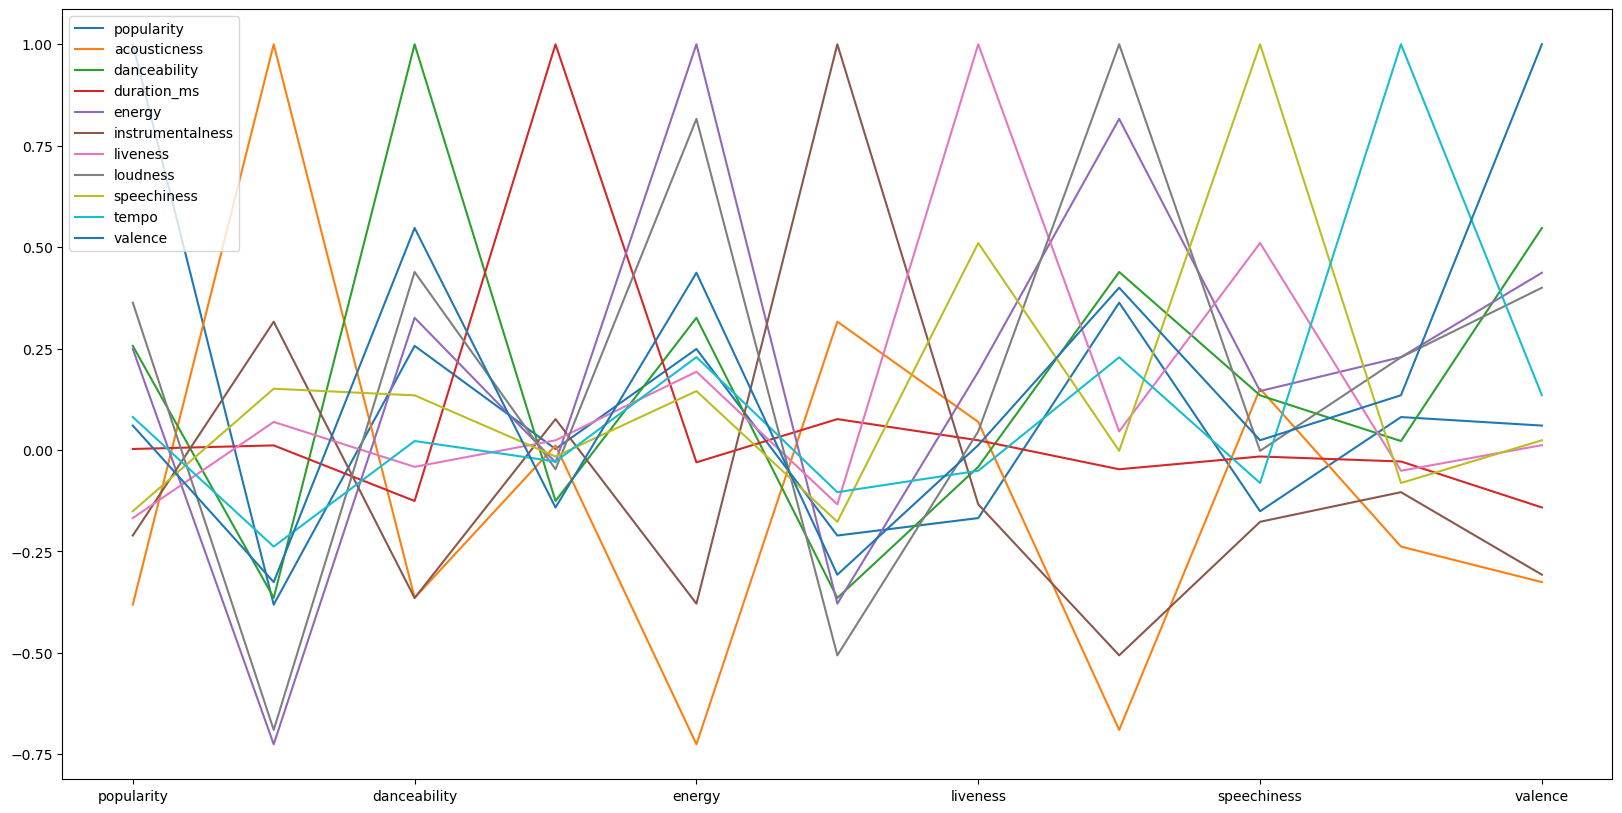

In [102]:
data_corr = data.corr()
data_corr.plot(figsize=(20,10))

<Axes: >

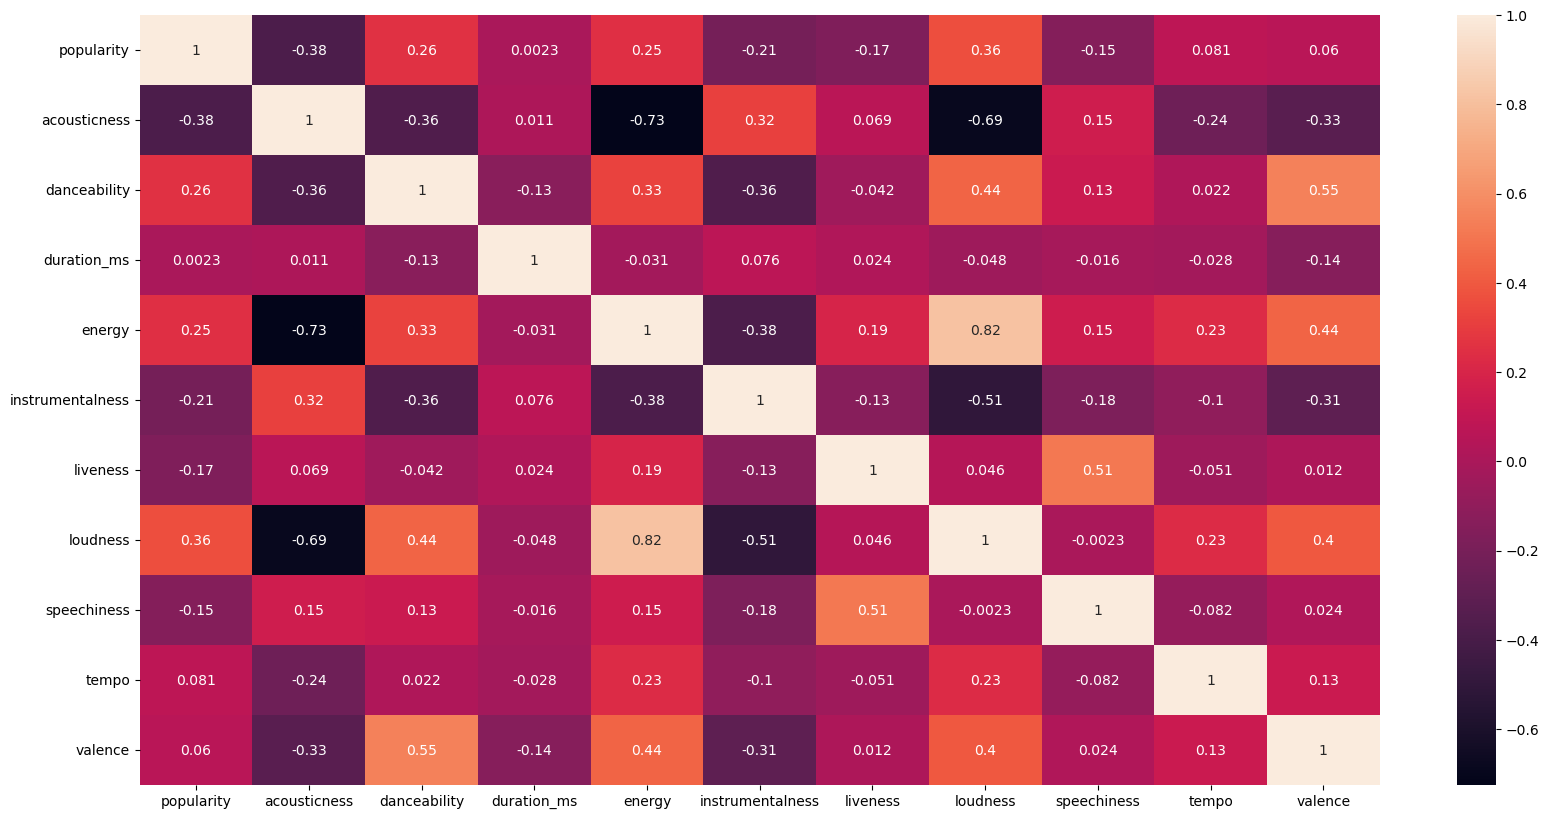

In [103]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [104]:
pd.isnull(data).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [105]:
data = data.sort_values(by='popularity', ascending=False)
data

genre      artist_name                                track_name  \
9027    Dance    Ariana Grande                                   7 rings   
107804    Pop    Ariana Grande                                   7 rings   
86951     Rap      Post Malone                                      Wow.   
107803    Pop      Post Malone                                      Wow.   
107802    Pop    Ariana Grande  break up with your girlfriend, i'm bored   
...       ...              ...                                       ...   
195435  Movie    Sally Dworsky                                Inside Out   
195434  Movie     Mike Douglas                            September Song   
195433  Movie      Keith David                       The Christmas Story   
195432  Movie  Charlton Heston               Chorus: Come And Go With Me   
0       Movie   Henri Salvador               C'est beau de faire un Show   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100      0.578000         0.725   
107804  14msK75pk3pA33pzPVNtBF         100      0.578000         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99      0.163000         0.833   
107803  6MWtB6iiXyIwun0YzU6DFP          99      0.163000         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99      0.042100         0.726   
...                        ...         ...           ...           ...   
195435  5d5BLVzCOxhgN02r2XqPWw           0      0.000305         0.456   
195434  5VSpKjPu6bud6KHyyWQrJ1           0      0.839000         0.331   
195433  5JdfRifr7rjLNy9kegVu5z           0      0.653000         0.604   
195432  5IF0TxLi4Jzo0qEdxhZbUy           0      0.972000         0.482   
0       0BRjO6ga9RKCKjfDqeFgWV           0      0.611000         0.389   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
9027         178640   0.321          0.000000  C#    0.0884   -10.744  Minor   
107804       178640   0.321          0.000000  C#    0.0884   -10.744  Minor   
86951        149520   0.539          0.000002   B    0.1010    -7.399  Minor   
107803       149520   0.539          0.000002   B    0.1010    -7.399  Minor   
107802       190440   0.554          0.000000   F    0.1060    -5.290  Minor   
...             ...     ...               ...  ..       ...       ...    ...   
195435       241400   0.804          0.000018   D    0.0418    -6.346  Major   
195434       282720   0.221          0.000189  A#    0.1030   -15.866  Major   
195433       207040   0.365          0.000097   C    0.1560   -12.274  Major   
195432        83667   0.312          0.000000  F#    0.1780   -18.565  Major   
0             99373   0.910          0.000000  C#    0.3460    -1.828  Major   

        speechiness    tempo time_signature  valence  
9027         0.3230   70.142            4/4    0.319  
107804       0.3230   70.142            4/4    0.319  
86951        0.1780   99.947            4/4    0.385  
107803       0.1780   99.947            4/4    0.385  
107802       0.0917  169.999            4/4    0.335  
...             ...      ...            ...      ...  
195435       0.0382  123.405            4/4    0.487  
195434       0.0298   76.001            4/4    0.071  
195433       0.3360  123.490            3/4    0.254  
195432       0.0456   78.739            4/4    0.281  
0            0.0525  166.969            4/4    0.814  

[232725 rows x 18 columns]

From this we can conclude that there were same songs written twice in different genres.

In [106]:
#removing duplicates
data.track_name.duplicated()

9027      False
107804     True
86951     False
107803     True
107802    False
          ...  
195435     True
195434     True
195433    False
195432    False
0         False
Name: track_name, Length: 232725, dtype: bool

In [107]:
data_unique_names=data.drop_duplicates("track_name")
data_unique_names

genre        artist_name                                track_name  \
9027      Dance      Ariana Grande                                   7 rings   
86951       Rap        Post Malone                                      Wow.   
107802      Pop      Ariana Grande  break up with your girlfriend, i'm bored   
66643   Hip-Hop       Daddy Yankee                                 Con Calma   
107812      Pop         Marshmello                                   Happier   
...         ...                ...                                       ...   
195440    Movie      Howard Ashman              Big Bob's Song (Bonus Track)   
195438    Movie  Riders In The Sky                     Blue Canadian Rockies   
195433    Movie        Keith David                       The Christmas Story   
195432    Movie    Charlton Heston               Chorus: Come And Go With Me   
0         Movie     Henri Salvador               C'est beau de faire un Show   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
66643   5w9c2J52mkdntKOmRLeM2m          98        0.1100         0.737   
107812  2dpaYNEQHiRxtZbfNsse99          97        0.1910         0.687   
...                        ...         ...           ...           ...   
195440  62mwgXfhmtFGrhScesajmu           0        0.9300         0.484   
195438  5raq1yamLnyJ1BwHTCqwfH           0        0.8820         0.287   
195433  5JdfRifr7rjLNy9kegVu5z           0        0.6530         0.604   
195432  5IF0TxLi4Jzo0qEdxhZbUy           0        0.9720         0.482   
0       0BRjO6ga9RKCKjfDqeFgWV           0        0.6110         0.389   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
9027         178640  0.3210          0.000000  C#    0.0884   -10.744  Minor   
86951        149520  0.5390          0.000002   B    0.1010    -7.399  Minor   
107802       190440  0.5540          0.000000   F    0.1060    -5.290  Minor   
66643        193227  0.8600          0.000002  G#    0.0574    -2.652  Minor   
107812       214290  0.7920          0.000000   F    0.1670    -2.749  Major   
...             ...     ...               ...  ..       ...       ...    ...   
195440       210093  0.0901          0.000217  F#    0.1510   -19.086  Major   
195438       165307  0.1040          0.000181   C    0.4090   -20.216  Major   
195433       207040  0.3650          0.000097   C    0.1560   -12.274  Major   
195432        83667  0.3120          0.000000  F#    0.1780   -18.565  Major   
0             99373  0.9100          0.000000  C#    0.3460    -1.828  Major   

        speechiness    tempo time_signature  valence  
9027         0.3230   70.142            4/4    0.319  
86951        0.1780   99.947            4/4    0.385  
107802       0.0917  169.999            4/4    0.335  
66643        0.0593   93.989            4/4    0.656  
107812       0.0452  100.015            4/4    0.671  
...             ...      ...            ...      ...  
195440       0.2410   79.022            4/4    0.293  
195438       0.0357  106.692            3/4    0.310  
195433       0.3360  123.490            3/4    0.254  
195432       0.0456   78.739            4/4    0.281  
0            0.0525  166.969            4/4    0.814  

[148615 rows x 18 columns]

Kept the previous data as I will be changing the data for the graphical representations.

In [108]:
data_conver = data.drop_duplicates("track_name")

# Value Analysis With Graphs

Let's look at popularity by energy. I rounded the numbers for better interpretation on the chart.

In [109]:
data_unique_names["energy"] = data_unique_names["energy"].round(1)
data_unique_names

genre        artist_name                                track_name  \
9027      Dance      Ariana Grande                                   7 rings   
86951       Rap        Post Malone                                      Wow.   
107802      Pop      Ariana Grande  break up with your girlfriend, i'm bored   
66643   Hip-Hop       Daddy Yankee                                 Con Calma   
107812      Pop         Marshmello                                   Happier   
...         ...                ...                                       ...   
195440    Movie      Howard Ashman              Big Bob's Song (Bonus Track)   
195438    Movie  Riders In The Sky                     Blue Canadian Rockies   
195433    Movie        Keith David                       The Christmas Story   
195432    Movie    Charlton Heston               Chorus: Come And Go With Me   
0         Movie     Henri Salvador               C'est beau de faire un Show   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
66643   5w9c2J52mkdntKOmRLeM2m          98        0.1100         0.737   
107812  2dpaYNEQHiRxtZbfNsse99          97        0.1910         0.687   
...                        ...         ...           ...           ...   
195440  62mwgXfhmtFGrhScesajmu           0        0.9300         0.484   
195438  5raq1yamLnyJ1BwHTCqwfH           0        0.8820         0.287   
195433  5JdfRifr7rjLNy9kegVu5z           0        0.6530         0.604   
195432  5IF0TxLi4Jzo0qEdxhZbUy           0        0.9720         0.482   
0       0BRjO6ga9RKCKjfDqeFgWV           0        0.6110         0.389   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
9027         178640     0.3          0.000000  C#    0.0884   -10.744  Minor   
86951        149520     0.5          0.000002   B    0.1010    -7.399  Minor   
107802       190440     0.6          0.000000   F    0.1060    -5.290  Minor   
66643        193227     0.9          0.000002  G#    0.0574    -2.652  Minor   
107812       214290     0.8          0.000000   F    0.1670    -2.749  Major   
...             ...     ...               ...  ..       ...       ...    ...   
195440       210093     0.1          0.000217  F#    0.1510   -19.086  Major   
195438       165307     0.1          0.000181   C    0.4090   -20.216  Major   
195433       207040     0.4          0.000097   C    0.1560   -12.274  Major   
195432        83667     0.3          0.000000  F#    0.1780   -18.565  Major   
0             99373     0.9          0.000000  C#    0.3460    -1.828  Major   

        speechiness    tempo time_signature  valence  
9027         0.3230   70.142            4/4    0.319  
86951        0.1780   99.947            4/4    0.385  
107802       0.0917  169.999            4/4    0.335  
66643        0.0593   93.989            4/4    0.656  
107812       0.0452  100.015            4/4    0.671  
...             ...      ...            ...      ...  
195440       0.2410   79.022            4/4    0.293  
195438       0.0357  106.692            3/4    0.310  
195433       0.3360  123.490            3/4    0.254  
195432       0.0456   78.739            4/4    0.281  
0            0.0525  166.969            4/4    0.814  

[148615 rows x 18 columns]

Text(0.5, 1.0, 'Popularity Based on Energy')

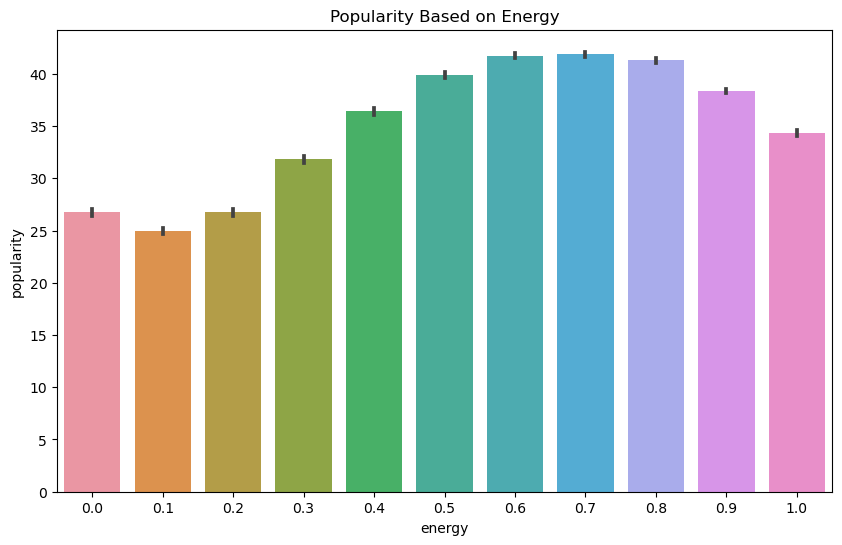

In [110]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data_unique_names, x="energy", y="popularity", ax=ax)
plt.title('Popularity Based on Energy')

This represents relation between 'popularity' and 'energy'

Text(0.5, 1.0, 'Popularity Based on Key')

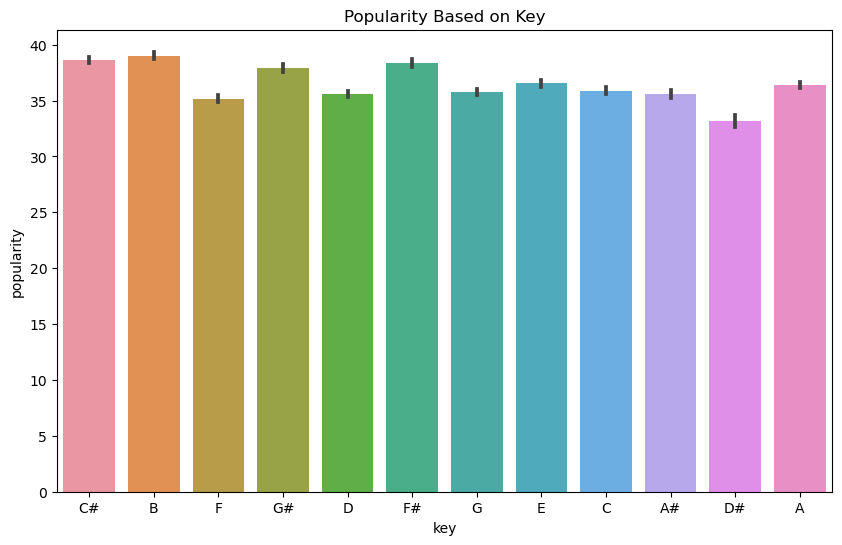

In [111]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'key', y = 'popularity', data = data_unique_names, ax=ax)
plt.title('Popularity Based on Key')

This represents relation between 'popularity' and 'key'

Text(0.5, 1.0, 'Popularity Based on Mode')

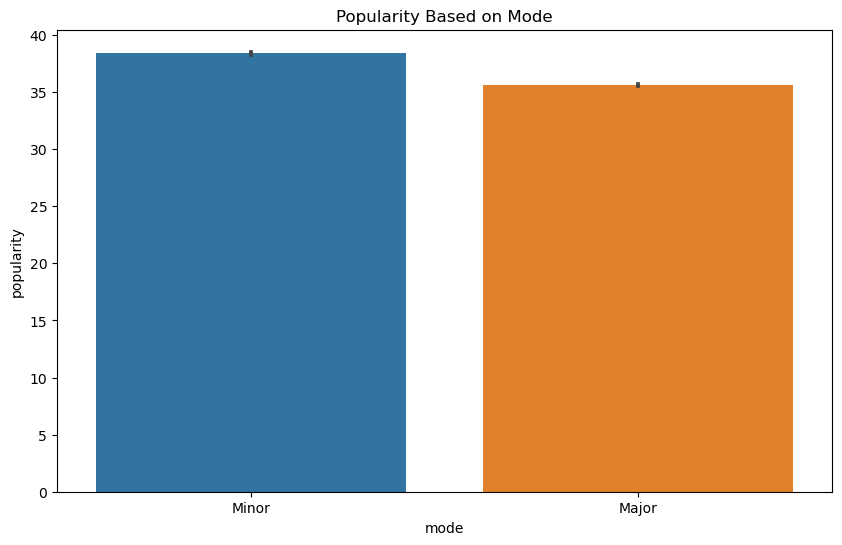

In [112]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'mode', y = 'popularity', data = data_unique_names, ax=ax)
plt.title('Popularity Based on Mode')

This represents relation between 'popularity' and 'mode'

Now, Since key and mod are related, I combined these two features in another barplot using "hue".

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

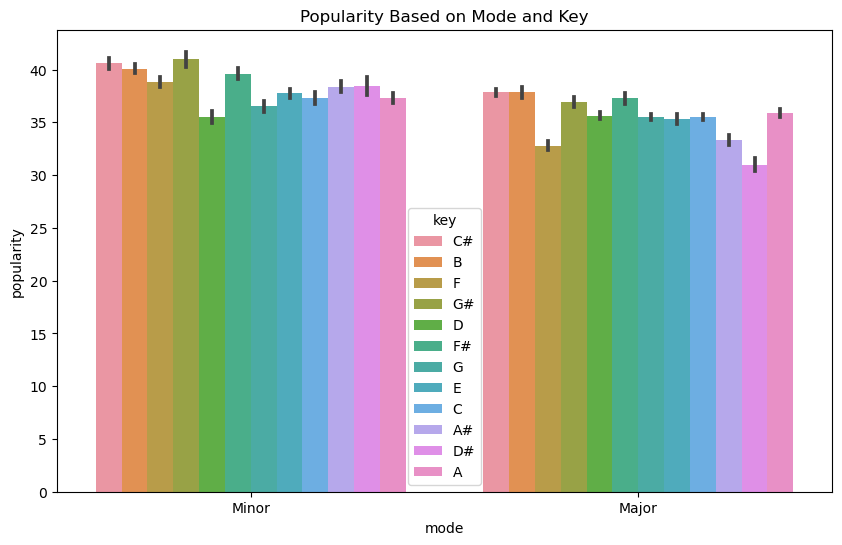

In [113]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = data_unique_names, ax=ax)
plt.title('Popularity Based on Mode and Key')

Let's look at popularity by acousticness.

In [114]:
#rounding the numbers for better interpretation on the chart.
data_unique_names["acousticness"] = data_unique_names["acousticness"].round(1)
data_unique_names

genre        artist_name                                track_name  \
9027      Dance      Ariana Grande                                   7 rings   
86951       Rap        Post Malone                                      Wow.   
107802      Pop      Ariana Grande  break up with your girlfriend, i'm bored   
66643   Hip-Hop       Daddy Yankee                                 Con Calma   
107812      Pop         Marshmello                                   Happier   
...         ...                ...                                       ...   
195440    Movie      Howard Ashman              Big Bob's Song (Bonus Track)   
195438    Movie  Riders In The Sky                     Blue Canadian Rockies   
195433    Movie        Keith David                       The Christmas Story   
195432    Movie    Charlton Heston               Chorus: Come And Go With Me   
0         Movie     Henri Salvador               C'est beau de faire un Show   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100           0.6         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99           0.2         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99           0.0         0.726   
66643   5w9c2J52mkdntKOmRLeM2m          98           0.1         0.737   
107812  2dpaYNEQHiRxtZbfNsse99          97           0.2         0.687   
...                        ...         ...           ...           ...   
195440  62mwgXfhmtFGrhScesajmu           0           0.9         0.484   
195438  5raq1yamLnyJ1BwHTCqwfH           0           0.9         0.287   
195433  5JdfRifr7rjLNy9kegVu5z           0           0.7         0.604   
195432  5IF0TxLi4Jzo0qEdxhZbUy           0           1.0         0.482   
0       0BRjO6ga9RKCKjfDqeFgWV           0           0.6         0.389   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
9027         178640     0.3          0.000000  C#    0.0884   -10.744  Minor   
86951        149520     0.5          0.000002   B    0.1010    -7.399  Minor   
107802       190440     0.6          0.000000   F    0.1060    -5.290  Minor   
66643        193227     0.9          0.000002  G#    0.0574    -2.652  Minor   
107812       214290     0.8          0.000000   F    0.1670    -2.749  Major   
...             ...     ...               ...  ..       ...       ...    ...   
195440       210093     0.1          0.000217  F#    0.1510   -19.086  Major   
195438       165307     0.1          0.000181   C    0.4090   -20.216  Major   
195433       207040     0.4          0.000097   C    0.1560   -12.274  Major   
195432        83667     0.3          0.000000  F#    0.1780   -18.565  Major   
0             99373     0.9          0.000000  C#    0.3460    -1.828  Major   

        speechiness    tempo time_signature  valence  
9027         0.3230   70.142            4/4    0.319  
86951        0.1780   99.947            4/4    0.385  
107802       0.0917  169.999            4/4    0.335  
66643        0.0593   93.989            4/4    0.656  
107812       0.0452  100.015            4/4    0.671  
...             ...      ...            ...      ...  
195440       0.2410   79.022            4/4    0.293  
195438       0.0357  106.692            3/4    0.310  
195433       0.3360  123.490            3/4    0.254  
195432       0.0456   78.739            4/4    0.281  
0            0.0525  166.969            4/4    0.814  

[148615 rows x 18 columns]

Text(0.5, 1.0, 'Popularity Based on Acousticness')

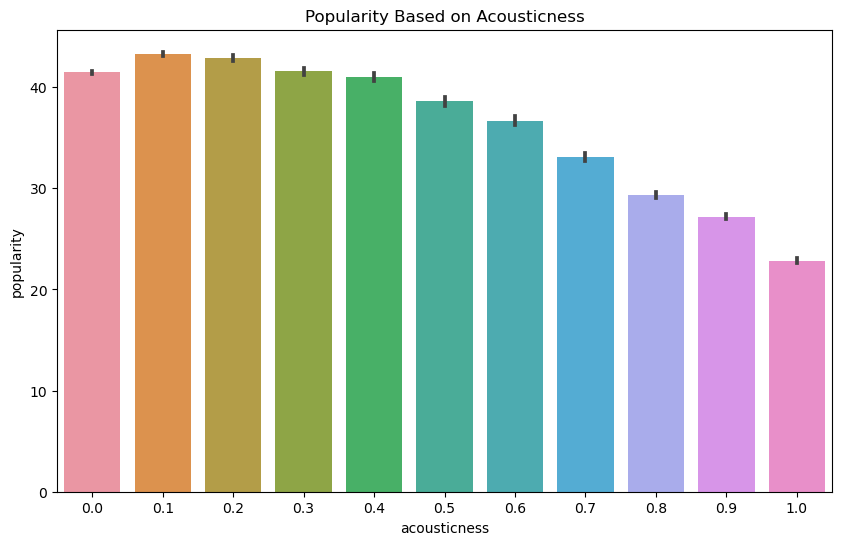

In [115]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data_unique_names, x="acousticness", y="popularity", ax=ax)
plt.title('Popularity Based on Acousticness')

Let's look at popularity by loudness:

In [117]:
# rounding the numbers for better interpretation on the chart.
data_unique_names["loudness"] = data_unique_names["loudness"].round(1)
data_unique_names

genre        artist_name                                track_name  \
9027      Dance      Ariana Grande                                   7 rings   
86951       Rap        Post Malone                                      Wow.   
107802      Pop      Ariana Grande  break up with your girlfriend, i'm bored   
66643   Hip-Hop       Daddy Yankee                                 Con Calma   
107812      Pop         Marshmello                                   Happier   
...         ...                ...                                       ...   
195440    Movie      Howard Ashman              Big Bob's Song (Bonus Track)   
195438    Movie  Riders In The Sky                     Blue Canadian Rockies   
195433    Movie        Keith David                       The Christmas Story   
195432    Movie    Charlton Heston               Chorus: Come And Go With Me   
0         Movie     Henri Salvador               C'est beau de faire un Show   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100           0.6         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99           0.2         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99           0.0         0.726   
66643   5w9c2J52mkdntKOmRLeM2m          98           0.1         0.737   
107812  2dpaYNEQHiRxtZbfNsse99          97           0.2         0.687   
...                        ...         ...           ...           ...   
195440  62mwgXfhmtFGrhScesajmu           0           0.9         0.484   
195438  5raq1yamLnyJ1BwHTCqwfH           0           0.9         0.287   
195433  5JdfRifr7rjLNy9kegVu5z           0           0.7         0.604   
195432  5IF0TxLi4Jzo0qEdxhZbUy           0           1.0         0.482   
0       0BRjO6ga9RKCKjfDqeFgWV           0           0.6         0.389   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
9027         178640     0.3          0.000000  C#    0.0884     -10.7  Minor   
86951        149520     0.5          0.000002   B    0.1010      -7.4  Minor   
107802       190440     0.6          0.000000   F    0.1060      -5.3  Minor   
66643        193227     0.9          0.000002  G#    0.0574      -2.7  Minor   
107812       214290     0.8          0.000000   F    0.1670      -2.7  Major   
...             ...     ...               ...  ..       ...       ...    ...   
195440       210093     0.1          0.000217  F#    0.1510     -19.1  Major   
195438       165307     0.1          0.000181   C    0.4090     -20.2  Major   
195433       207040     0.4          0.000097   C    0.1560     -12.3  Major   
195432        83667     0.3          0.000000  F#    0.1780     -18.6  Major   
0             99373     0.9          0.000000  C#    0.3460      -1.8  Major   

        speechiness    tempo time_signature  valence  
9027         0.3230   70.142            4/4    0.319  
86951        0.1780   99.947            4/4    0.385  
107802       0.0917  169.999            4/4    0.335  
66643        0.0593   93.989            4/4    0.656  
107812       0.0452  100.015            4/4    0.671  
...             ...      ...            ...      ...  
195440       0.2410   79.022            4/4    0.293  
195438       0.0357  106.692            3/4    0.310  
195433       0.3360  123.490            3/4    0.254  
195432       0.0456   78.739            4/4    0.281  
0            0.0525  166.969            4/4    0.814  

[148615 rows x 18 columns]

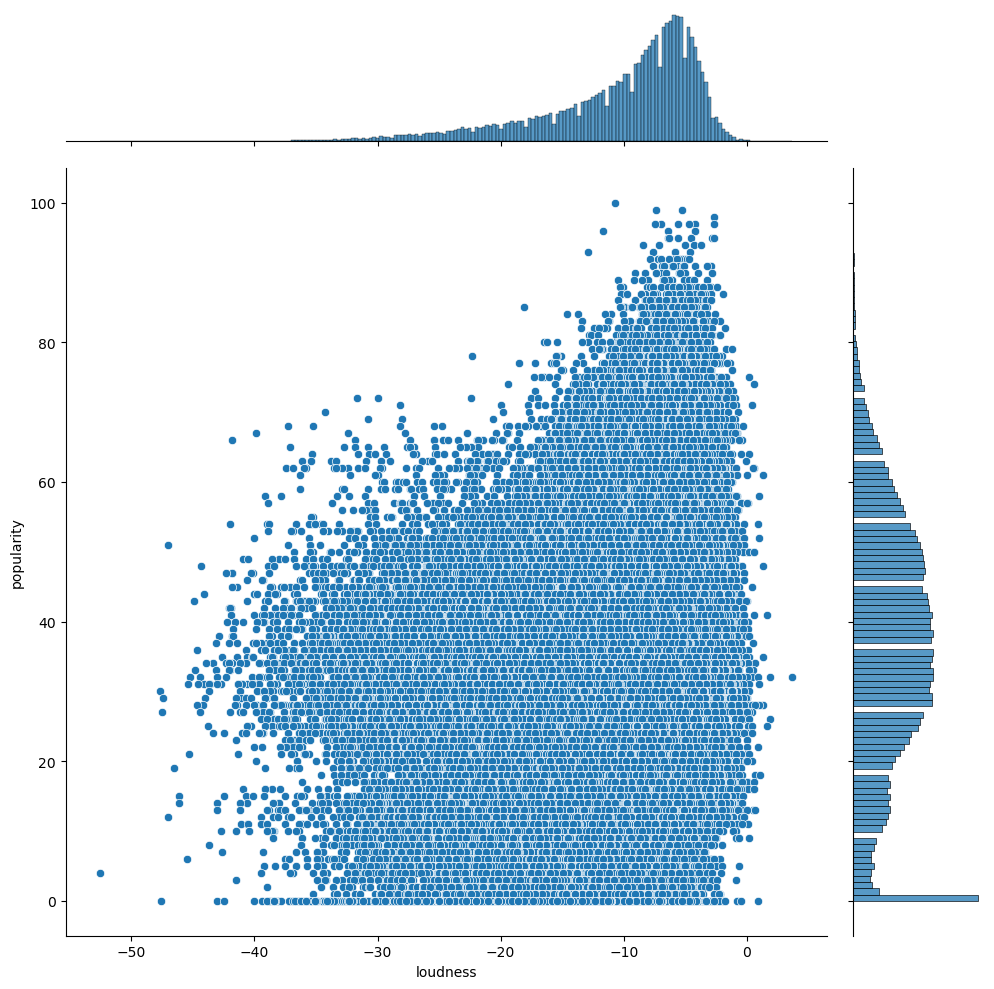

In [118]:
sns.jointplot(x = 'loudness', y = 'popularity', data=data_unique_names,height=10)

Lets examine at the region where the density is high in the above graph:

(0.0, 100.0)

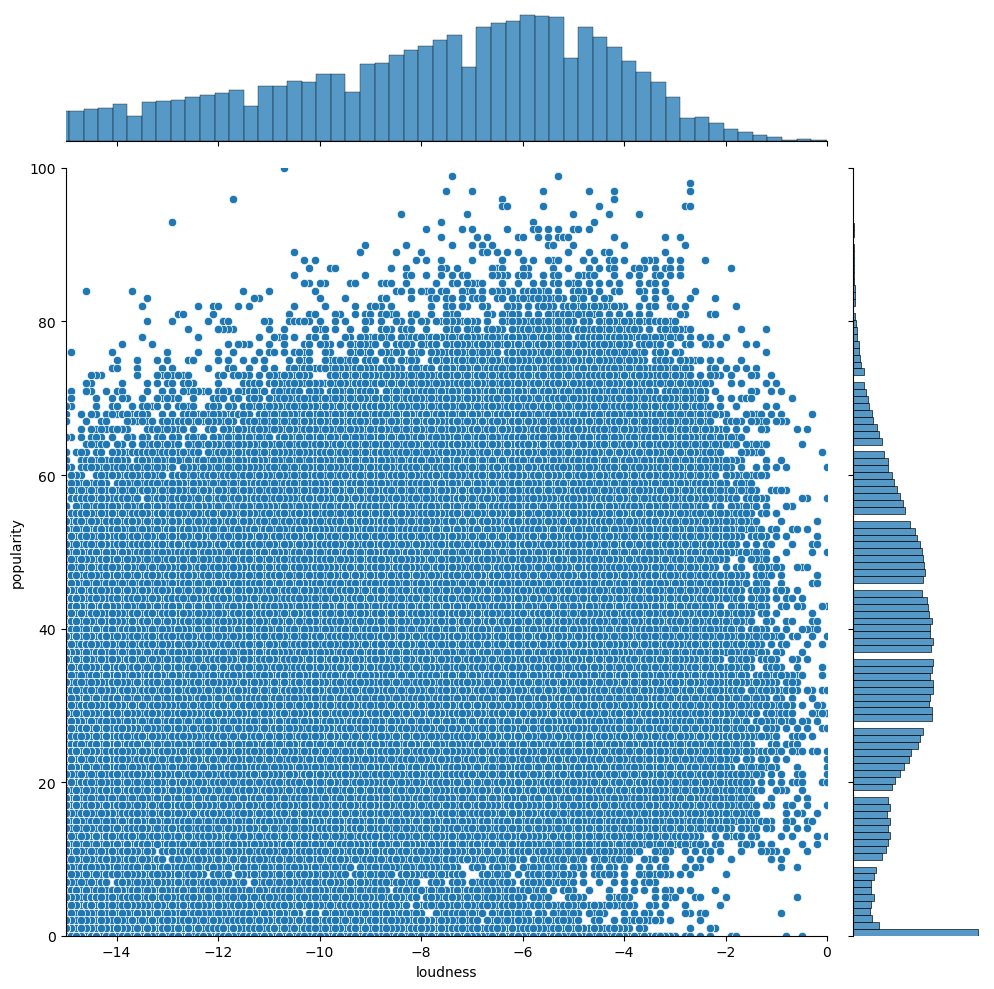

In [119]:
plot_loudness= sns.jointplot(x = 'loudness', y = 'popularity', data=data_unique_names, height=10)
plot_loudness.ax_marg_x.set_xlim(-15, 0)
plot_loudness.ax_marg_y.set_ylim(0, 100)

Now let's look at popularity by danceability:

In [120]:
# rounding the numbers for better interpretation on the chart.
data_unique_names["danceability"] = data_unique_names["danceability"].round(1)
data_unique_names

genre        artist_name                                track_name  \
9027      Dance      Ariana Grande                                   7 rings   
86951       Rap        Post Malone                                      Wow.   
107802      Pop      Ariana Grande  break up with your girlfriend, i'm bored   
66643   Hip-Hop       Daddy Yankee                                 Con Calma   
107812      Pop         Marshmello                                   Happier   
...         ...                ...                                       ...   
195440    Movie      Howard Ashman              Big Bob's Song (Bonus Track)   
195438    Movie  Riders In The Sky                     Blue Canadian Rockies   
195433    Movie        Keith David                       The Christmas Story   
195432    Movie    Charlton Heston               Chorus: Come And Go With Me   
0         Movie     Henri Salvador               C'est beau de faire un Show   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100           0.6           0.7   
86951   6MWtB6iiXyIwun0YzU6DFP          99           0.2           0.8   
107802  4kV4N9D1iKVxx1KLvtTpjS          99           0.0           0.7   
66643   5w9c2J52mkdntKOmRLeM2m          98           0.1           0.7   
107812  2dpaYNEQHiRxtZbfNsse99          97           0.2           0.7   
...                        ...         ...           ...           ...   
195440  62mwgXfhmtFGrhScesajmu           0           0.9           0.5   
195438  5raq1yamLnyJ1BwHTCqwfH           0           0.9           0.3   
195433  5JdfRifr7rjLNy9kegVu5z           0           0.7           0.6   
195432  5IF0TxLi4Jzo0qEdxhZbUy           0           1.0           0.5   
0       0BRjO6ga9RKCKjfDqeFgWV           0           0.6           0.4   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
9027         178640     0.3          0.000000  C#    0.0884     -10.7  Minor   
86951        149520     0.5          0.000002   B    0.1010      -7.4  Minor   
107802       190440     0.6          0.000000   F    0.1060      -5.3  Minor   
66643        193227     0.9          0.000002  G#    0.0574      -2.7  Minor   
107812       214290     0.8          0.000000   F    0.1670      -2.7  Major   
...             ...     ...               ...  ..       ...       ...    ...   
195440       210093     0.1          0.000217  F#    0.1510     -19.1  Major   
195438       165307     0.1          0.000181   C    0.4090     -20.2  Major   
195433       207040     0.4          0.000097   C    0.1560     -12.3  Major   
195432        83667     0.3          0.000000  F#    0.1780     -18.6  Major   
0             99373     0.9          0.000000  C#    0.3460      -1.8  Major   

        speechiness    tempo time_signature  valence  
9027         0.3230   70.142            4/4    0.319  
86951        0.1780   99.947            4/4    0.385  
107802       0.0917  169.999            4/4    0.335  
66643        0.0593   93.989            4/4    0.656  
107812       0.0452  100.015            4/4    0.671  
...             ...      ...            ...      ...  
195440       0.2410   79.022            4/4    0.293  
195438       0.0357  106.692            3/4    0.310  
195433       0.3360  123.490            3/4    0.254  
195432       0.0456   78.739            4/4    0.281  
0            0.0525  166.969            4/4    0.814  

[148615 rows x 18 columns]

Text(0.5, 1.0, 'Popularity Based on Time Danceability')

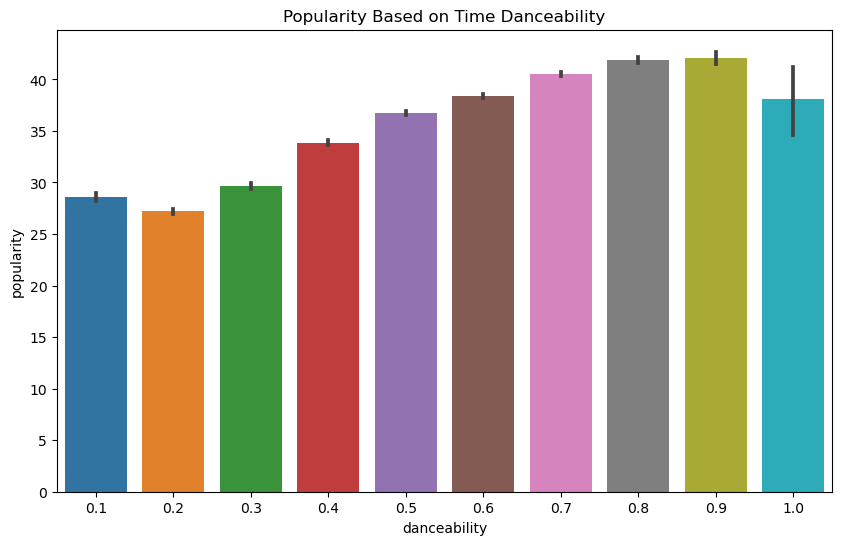

In [121]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data_unique_names, x="danceability", y="popularity", ax=ax)
plt.title('Popularity Based on Time Danceability')

Now let's look at popularity by instrumentalness:

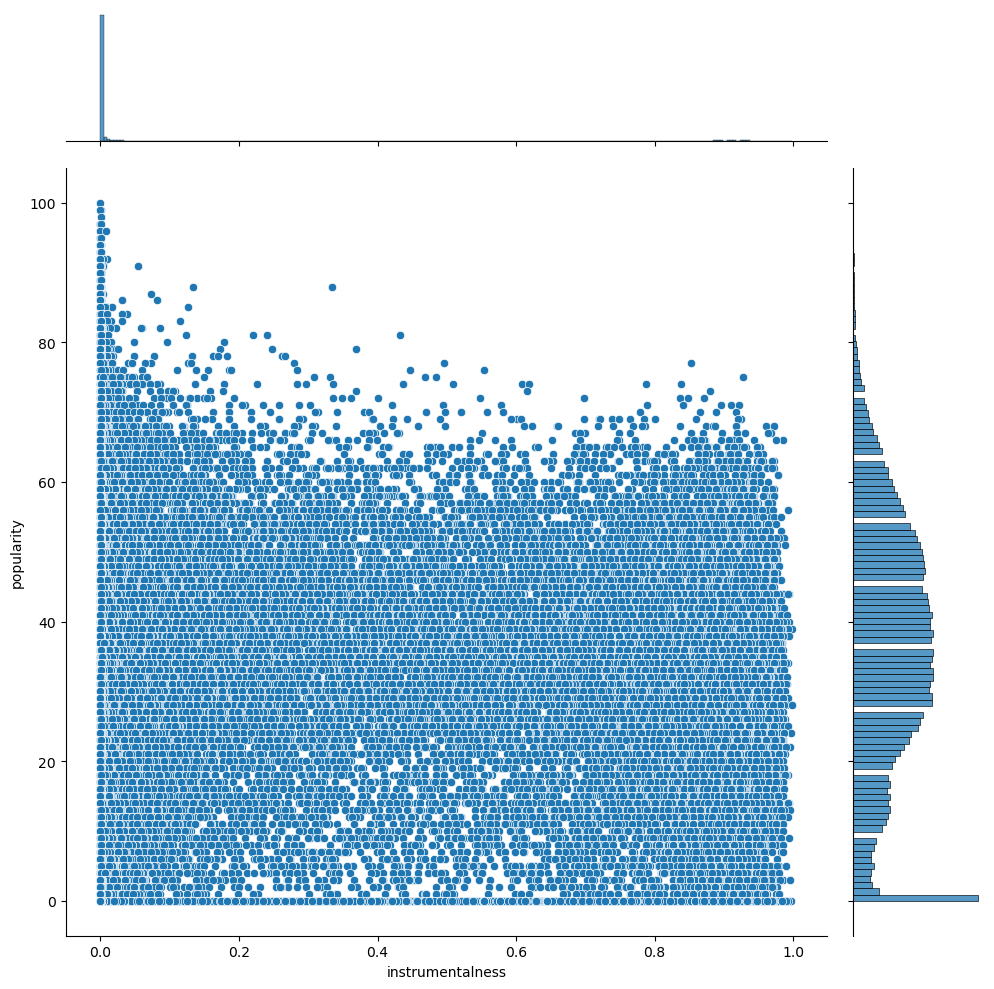

In [122]:
sns.jointplot(x = 'instrumentalness', y = 'popularity', data=data_unique_names,height=10)

Let's examine at the region where the density is high in the above graph:

(0.0, 100.0)

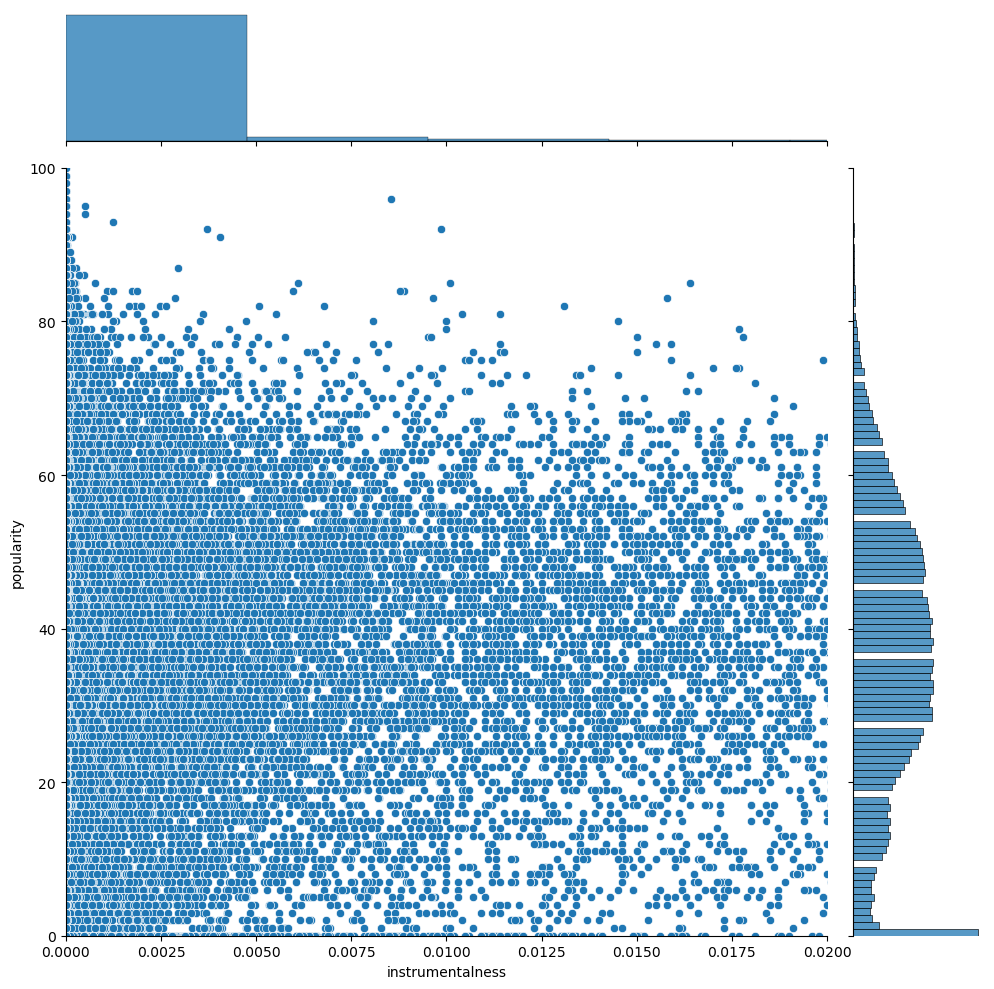

In [123]:
plot_instrumentalness= sns.jointplot(x = 'instrumentalness', y = 'popularity', data=data_unique_names, height=10)
plot_instrumentalness.ax_marg_x.set_xlim(0, 0.02)
plot_instrumentalness.ax_marg_y.set_ylim(0, 100)

Since duration_ms is in milliseconds, Let's convert it to minutes.

In [124]:
data_unique_names.duration_ms.head()

9027      178640
86951     149520
107802    190440
66643     193227
107812    214290
Name: duration_ms, dtype: int64

In [125]:
seconds=(data_unique_names.duration_ms/1000)%60

seconds = seconds.round()/100

minutes=(data_unique_names.duration_ms/(1000*60))%60

minutes = np.floor(minutes)

duration_min = minutes + seconds

duration_min

9027      2.59
86951     2.30
107802    3.10
66643     3.13
107812    3.34
          ... 
195440    3.30
195438    2.45
195433    3.27
195432    1.24
0         1.39
Name: duration_ms, Length: 148615, dtype: float64

Now let's add "duration_min" to the table.

In [126]:
data_unique_names["duration_min"] = duration_min
data_unique_names

genre        artist_name                                track_name  \
9027      Dance      Ariana Grande                                   7 rings   
86951       Rap        Post Malone                                      Wow.   
107802      Pop      Ariana Grande  break up with your girlfriend, i'm bored   
66643   Hip-Hop       Daddy Yankee                                 Con Calma   
107812      Pop         Marshmello                                   Happier   
...         ...                ...                                       ...   
195440    Movie      Howard Ashman              Big Bob's Song (Bonus Track)   
195438    Movie  Riders In The Sky                     Blue Canadian Rockies   
195433    Movie        Keith David                       The Christmas Story   
195432    Movie    Charlton Heston               Chorus: Come And Go With Me   
0         Movie     Henri Salvador               C'est beau de faire un Show   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100           0.6           0.7   
86951   6MWtB6iiXyIwun0YzU6DFP          99           0.2           0.8   
107802  4kV4N9D1iKVxx1KLvtTpjS          99           0.0           0.7   
66643   5w9c2J52mkdntKOmRLeM2m          98           0.1           0.7   
107812  2dpaYNEQHiRxtZbfNsse99          97           0.2           0.7   
...                        ...         ...           ...           ...   
195440  62mwgXfhmtFGrhScesajmu           0           0.9           0.5   
195438  5raq1yamLnyJ1BwHTCqwfH           0           0.9           0.3   
195433  5JdfRifr7rjLNy9kegVu5z           0           0.7           0.6   
195432  5IF0TxLi4Jzo0qEdxhZbUy           0           1.0           0.5   
0       0BRjO6ga9RKCKjfDqeFgWV           0           0.6           0.4   

        duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
9027         178640     0.3          0.000000  C#    0.0884     -10.7  Minor   
86951        149520     0.5          0.000002   B    0.1010      -7.4  Minor   
107802       190440     0.6          0.000000   F    0.1060      -5.3  Minor   
66643        193227     0.9          0.000002  G#    0.0574      -2.7  Minor   
107812       214290     0.8          0.000000   F    0.1670      -2.7  Major   
...             ...     ...               ...  ..       ...       ...    ...   
195440       210093     0.1          0.000217  F#    0.1510     -19.1  Major   
195438       165307     0.1          0.000181   C    0.4090     -20.2  Major   
195433       207040     0.4          0.000097   C    0.1560     -12.3  Major   
195432        83667     0.3          0.000000  F#    0.1780     -18.6  Major   
0             99373     0.9          0.000000  C#    0.3460      -1.8  Major   

        speechiness    tempo time_signature  valence  duration_min  
9027         0.3230   70.142            4/4    0.319          2.59  
86951        0.1780   99.947            4/4    0.385          2.30  
107802       0.0917  169.999            4/4    0.335          3.10  
66643        0.0593   93.989            4/4    0.656          3.13  
107812       0.0452  100.015            4/4    0.671          3.34  
...             ...      ...            ...      ...           ...  
195440       0.2410   79.022            4/4    0.293          3.30  
195438       0.0357  106.692            3/4    0.310          2.45  
195433       0.3360  123.490            3/4    0.254          3.27  
195432       0.0456   78.739            4/4    0.281          1.24  
0            0.0525  166.969            4/4    0.814          1.39  

[148615 rows x 19 columns]

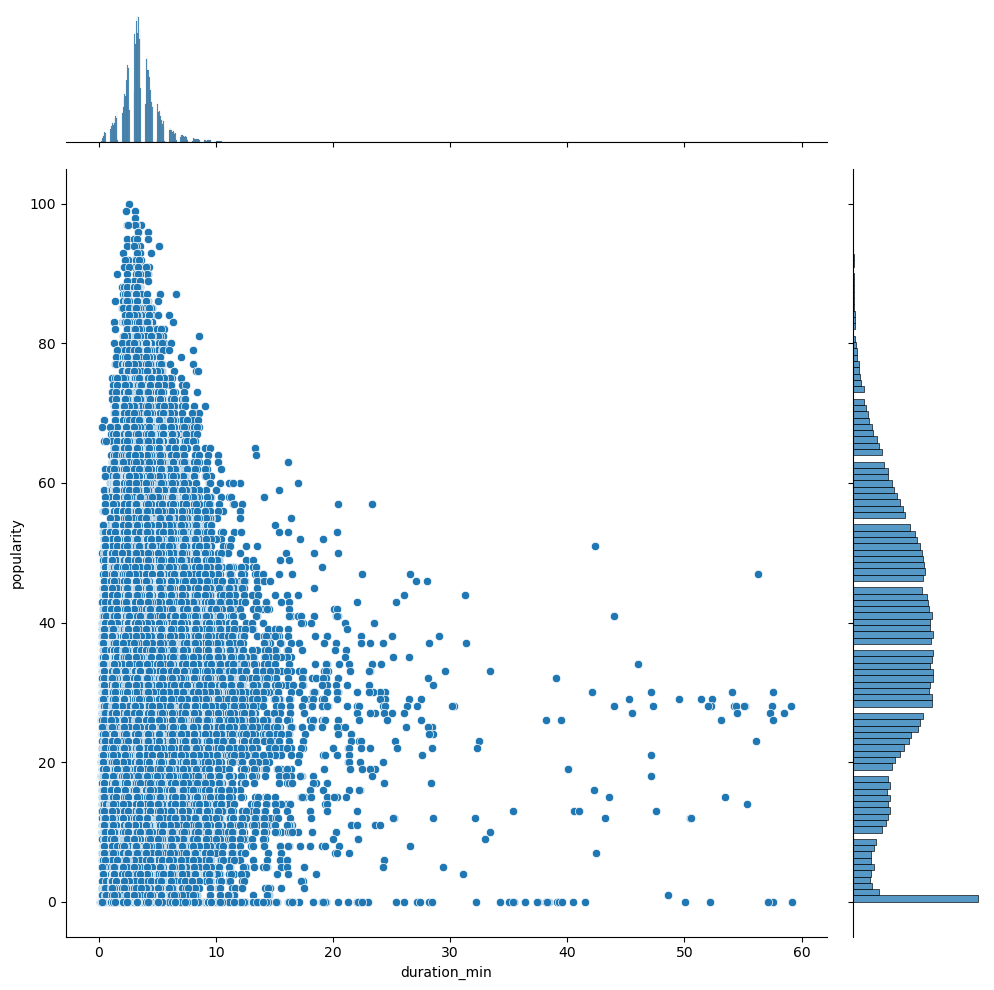

In [127]:
sns.jointplot(x = 'duration_min', y = 'popularity', data=data_unique_names,height=10)

Let's examine at the region where the density is high in the above graph:

(0.0, 100.0)

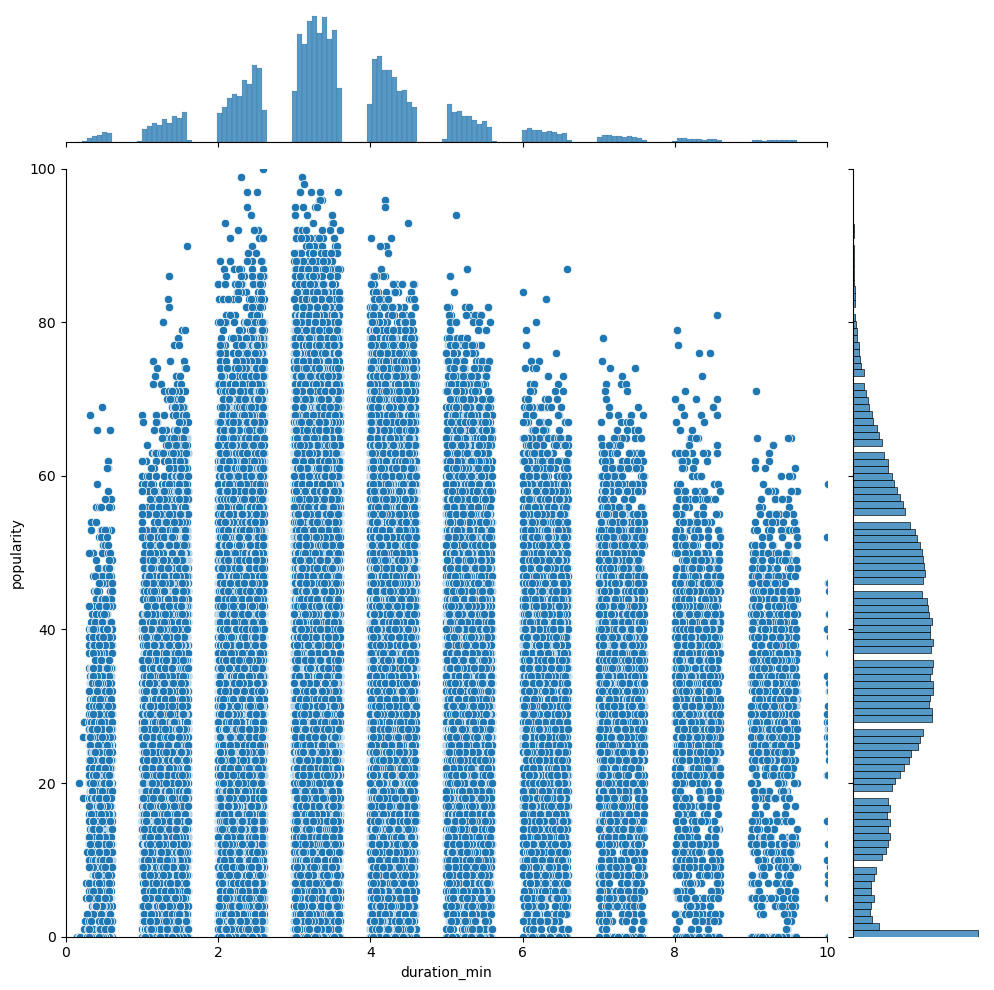

In [128]:
plot_duration_min= sns.jointplot(x = 'duration_min', y = 'popularity', data=data_unique_names, height=10)
plot_duration_min.ax_marg_x.set_xlim(0, 10)
plot_duration_min.ax_marg_y.set_ylim(0, 100)

Let's look at popularity by liveness.

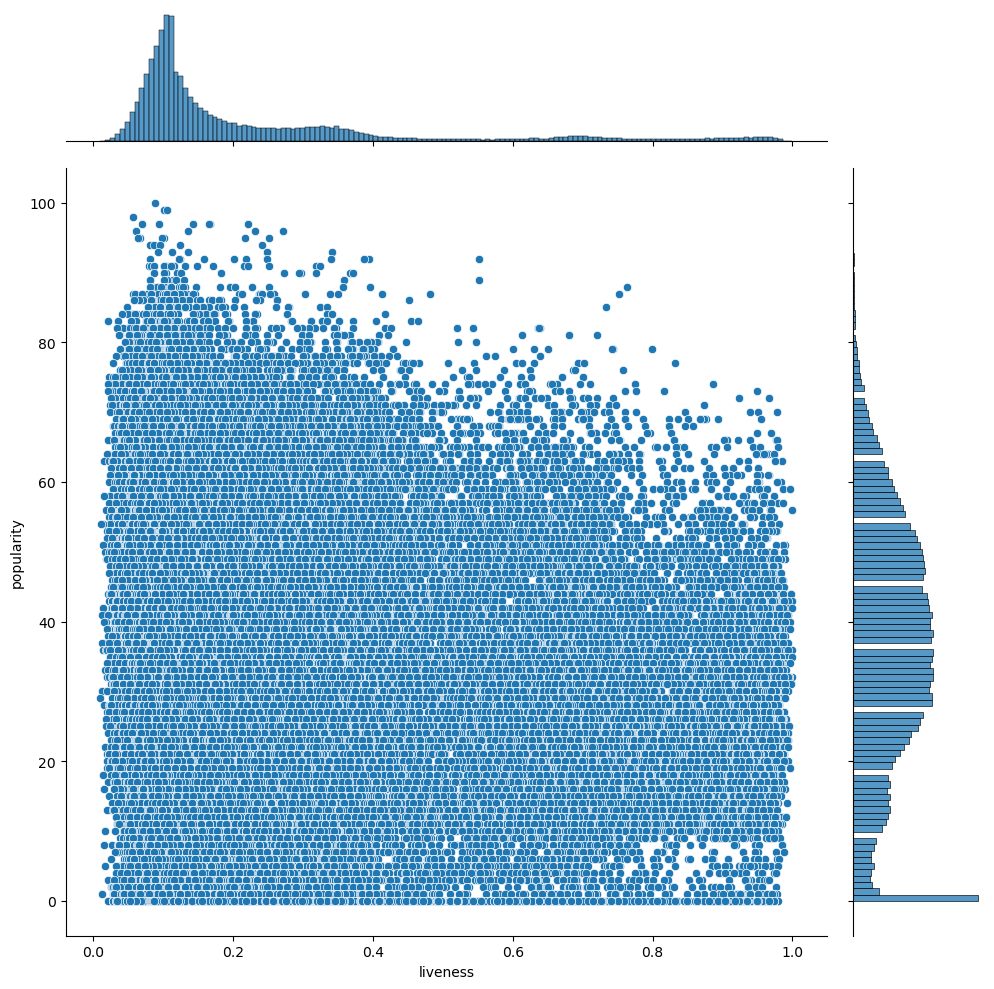

In [130]:
sns.jointplot(x = 'liveness', y = 'popularity', data=data_unique_names,height=10)

Let's examine at the region where the density is high in the above graph:

(0.0, 100.0)

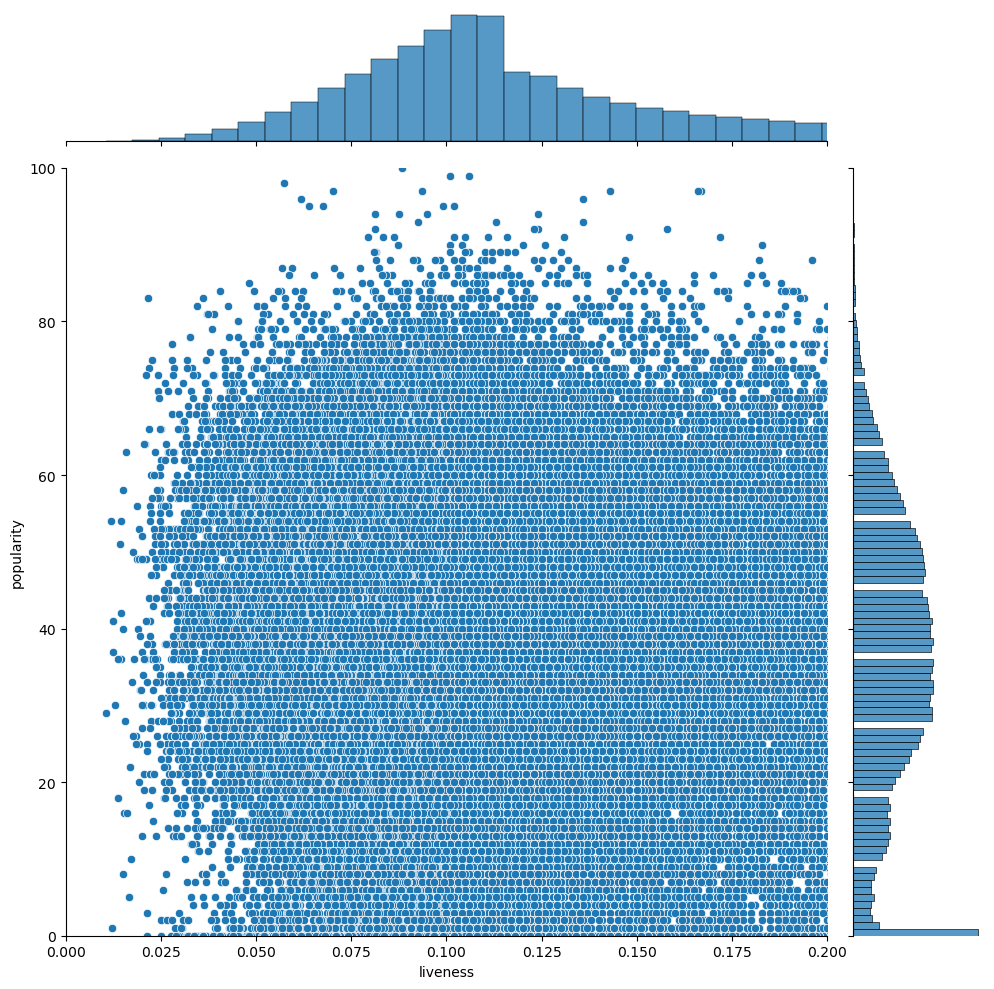

In [131]:
plot_liveness= sns.jointplot(x = 'liveness', y = 'popularity', data=data_unique_names, height=10)
plot_liveness.ax_marg_x.set_xlim(0, 0.2)
plot_liveness.ax_marg_y.set_ylim(0, 100)

Let's look at popularity by speechiness.

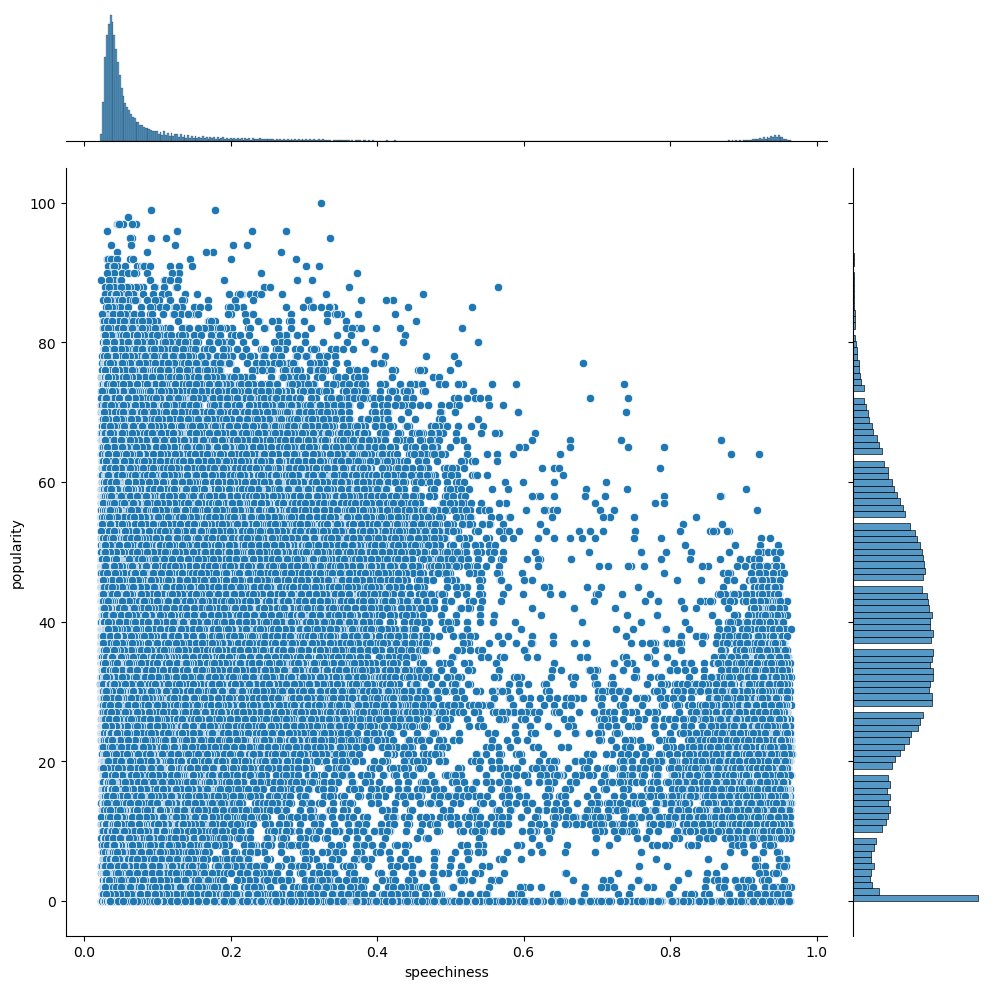

In [132]:
sns.jointplot(x = 'speechiness', y = 'popularity', data=data_unique_names,height=10)

Let's examine at the region where the density is high in the above graph:

(0.0, 100.0)

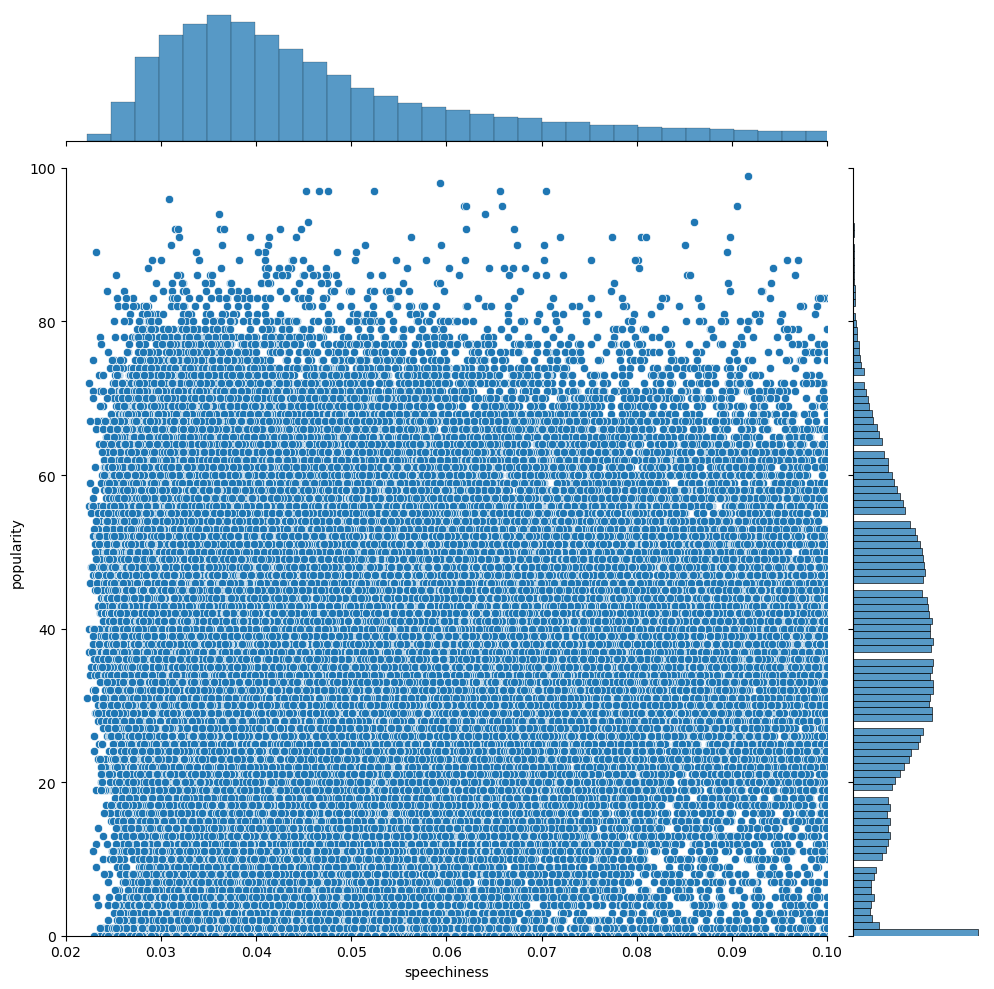

In [133]:
plot_speechiness= sns.jointplot(x = 'speechiness', y = 'popularity', data=data_unique_names, height=10)
plot_speechiness.ax_marg_x.set_xlim(0.02, 0.1)
plot_speechiness.ax_marg_y.set_ylim(0, 100)

Let's look at popularity by tempo.

In [134]:
data_unique_names.tempo

9027       70.142
86951      99.947
107802    169.999
66643      93.989
107812    100.015
           ...   
195440     79.022
195438    106.692
195433    123.490
195432     78.739
0         166.969
Name: tempo, Length: 148615, dtype: float64

In [135]:
# rounding the numbers for better interpretation on the chart.
data_unique_names["tempo"] = data_unique_names["tempo"].round()
data_unique_names.tempo

9027       70.0
86951     100.0
107802    170.0
66643      94.0
107812    100.0
          ...  
195440     79.0
195438    107.0
195433    123.0
195432     79.0
0         167.0
Name: tempo, Length: 148615, dtype: float64

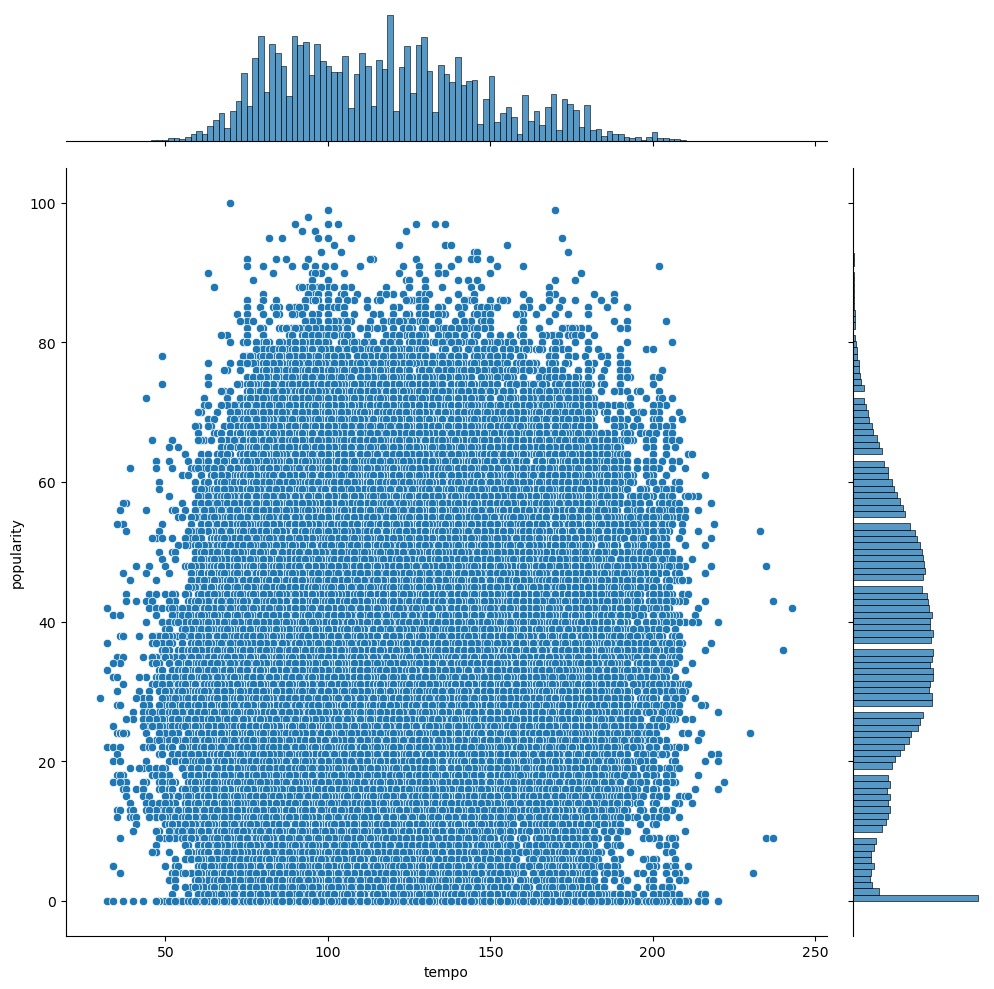

In [136]:
sns.jointplot(x = 'tempo', y = 'popularity', data=data_unique_names,height=10)

Let's examine at the region where the density is high in the above graph:

(0.0, 100.0)

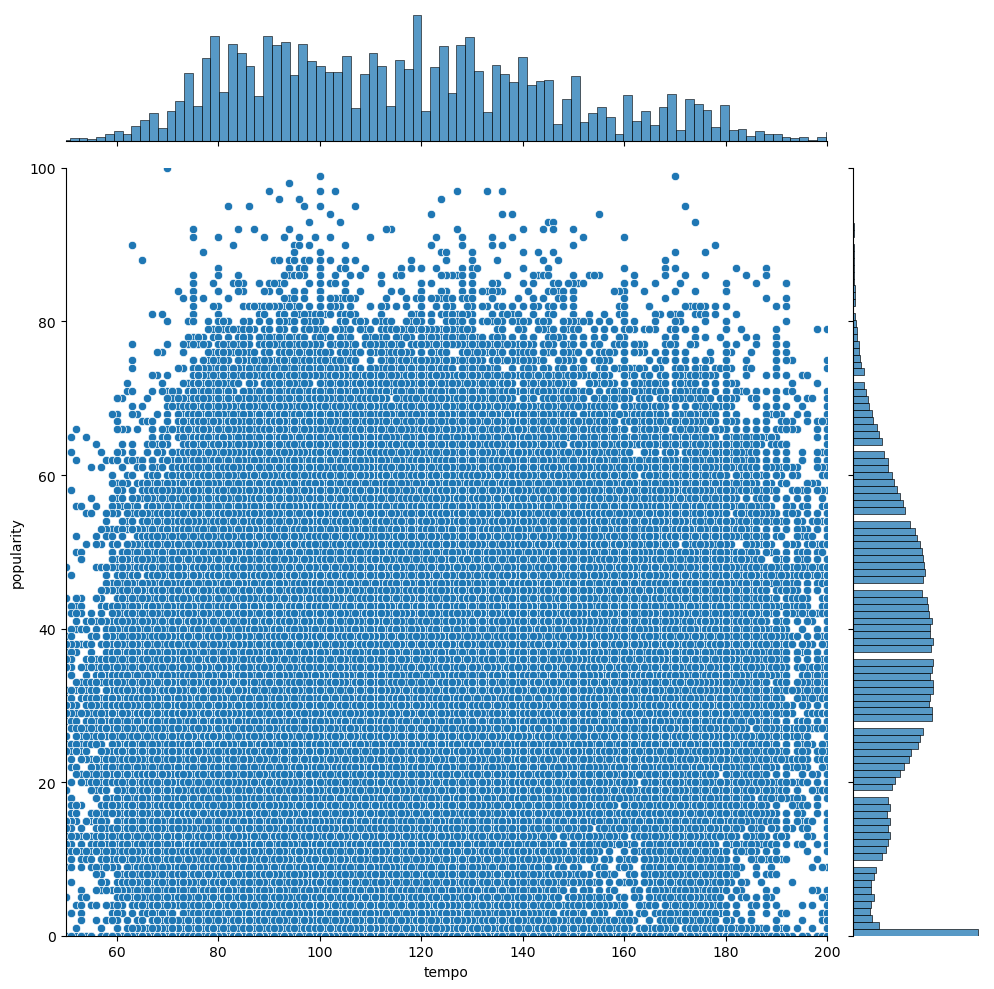

In [137]:
plot_tempo= sns.jointplot(x = 'tempo', y = 'popularity', data=data_unique_names, height=10)
plot_tempo.ax_marg_x.set_xlim(50, 200)
plot_tempo.ax_marg_y.set_ylim(0, 100)

Let's look at popularity by time_signature.

Text(0.5, 1.0, 'Popularity Based on Time Signature')

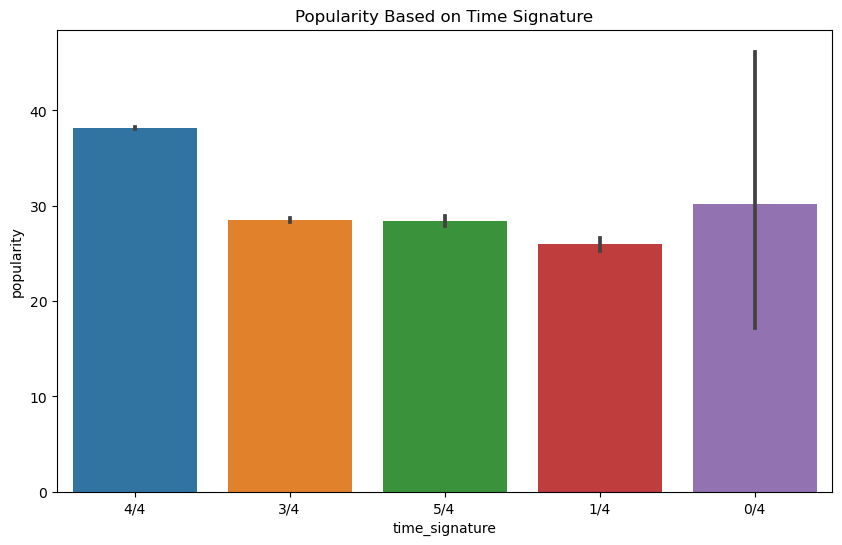

In [138]:

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=data_unique_names, x="time_signature", y="popularity", ax=ax)
plt.title('Popularity Based on Time Signature')

Let's look at popularity by valence.

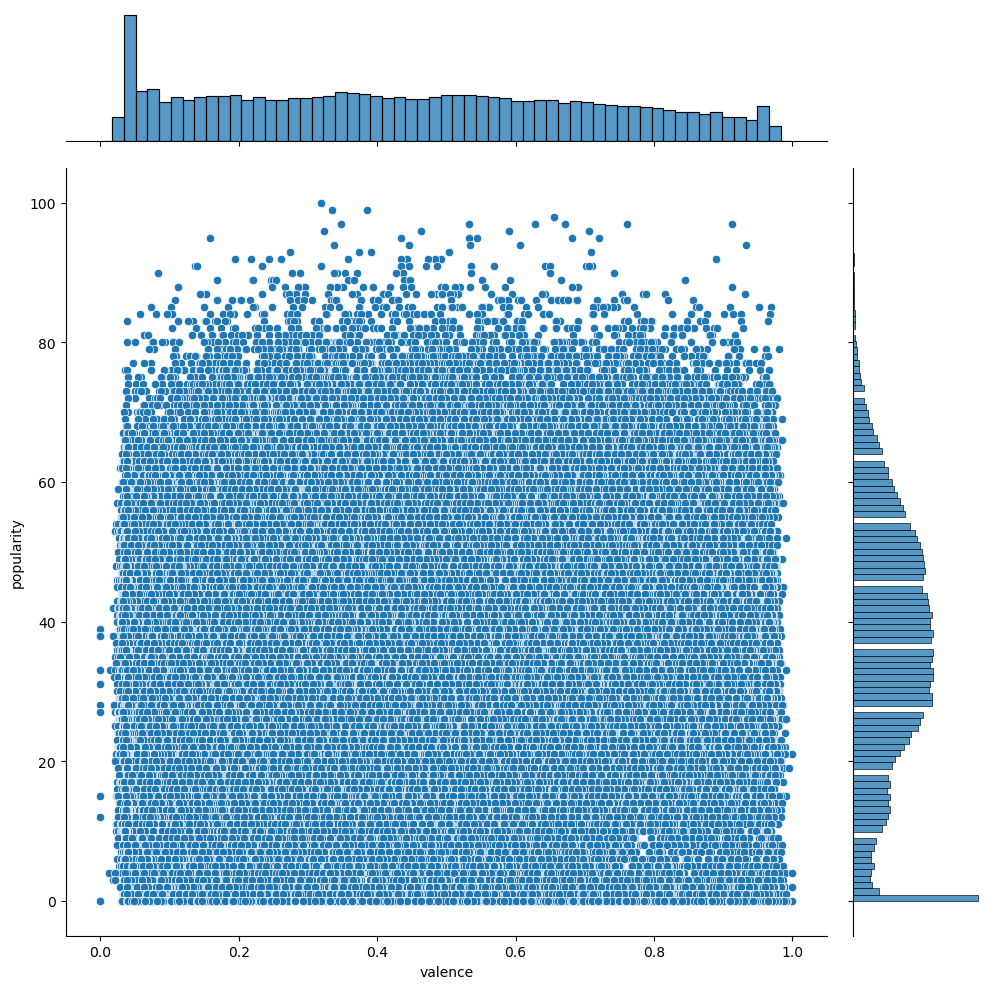

In [139]:
sns.jointplot(x = 'valence', y = 'popularity', data=data_unique_names,height=10)

Let's examine at the region where the density is high in the above graph:

(0.0, 100.0)

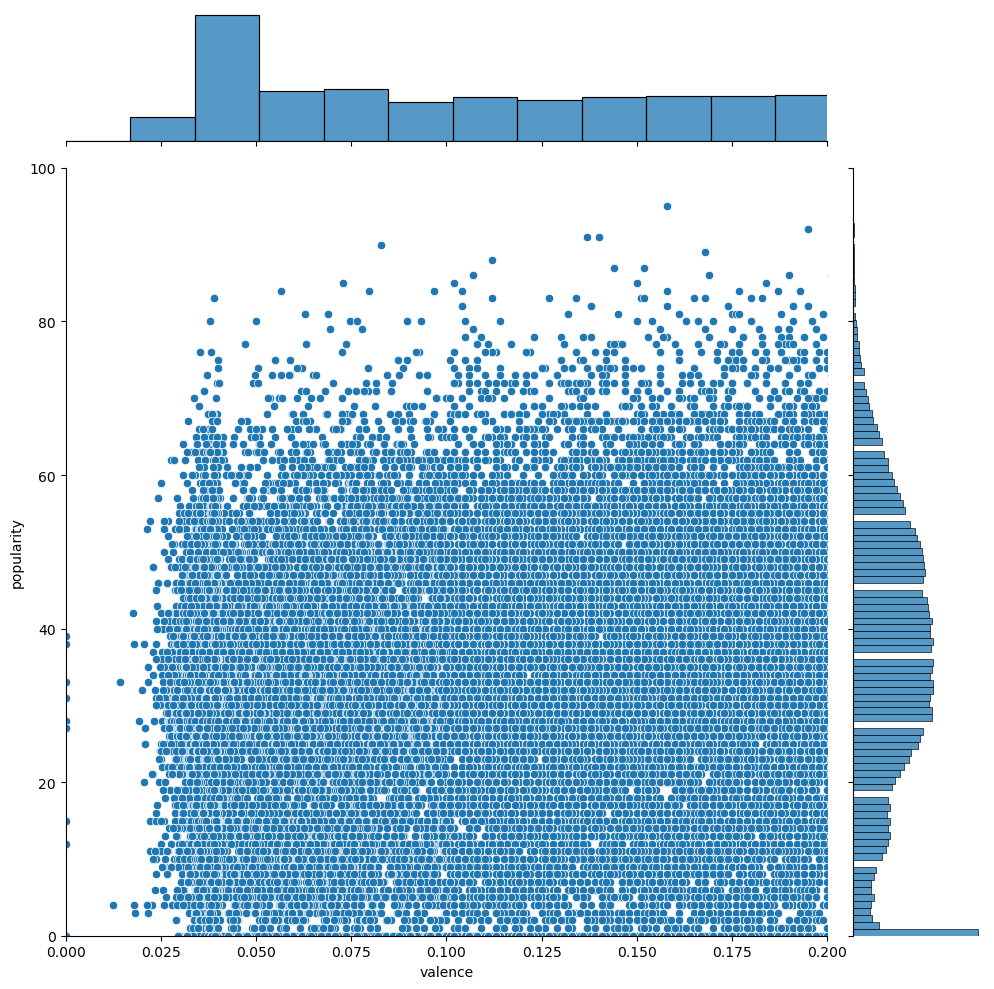

In [140]:
plot_valenceo= sns.jointplot(x = 'valence', y = 'popularity', data=data_unique_names, height=10)
plot_valenceo.ax_marg_x.set_xlim(0, 0.2)
plot_valenceo.ax_marg_y.set_ylim(0, 100)

Let's look at popularity by genre.

Text(0.5, 1.0, 'Popularity Based on Genre')

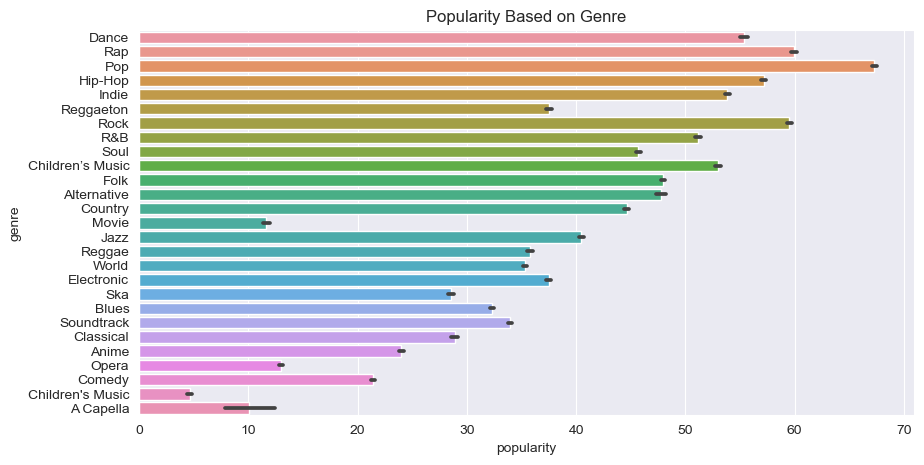

In [141]:
sns.set_style(style = "darkgrid")
plt.figure(figsize = (10,5))
sns.barplot(y = 'genre', x = 'popularity', data = data_unique_names)
plt.title('Popularity Based on Genre')

## Numerical Conversion

Since there are 12 letter keys , I convert C# to 0, B to 1, and so on and so forth until A is 12.

In [142]:
pd.unique(data_conver["key"])

array(['C#', 'B', 'F', 'G#', 'D', 'F#', 'G', 'E', 'C', 'A#', 'D#', 'A'],
      dtype=object)

In [143]:
data_conver.key.head()

9027      C#
86951      B
107802     F
66643     G#
107812     F
Name: key, dtype: object

In [144]:
list_of_keys = data_conver["key"].unique()
for i in range(len(list_of_keys)):
    data_conver.loc[data_conver["key"] == list_of_keys[i], "key"] = i
data_conver.key.head()

9027      0
86951     1
107802    2
66643     3
107812    2
Name: key, dtype: object

In [145]:
pd.unique(data_conver["mode"])

array(['Minor', 'Major'], dtype=object)

In [147]:
data_conver.loc[data_conver["mode"] == 'Major', "mode"] = 1
data_conver.loc[data_conver["mode"] == 'Minor', "mode"] = 0
data_conver.head()

genre    artist_name                                track_name  \
9027      Dance  Ariana Grande                                   7 rings   
86951       Rap    Post Malone                                      Wow.   
107802      Pop  Ariana Grande  break up with your girlfriend, i'm bored   
66643   Hip-Hop   Daddy Yankee                                 Con Calma   
107812      Pop     Marshmello                                   Happier   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
66643   5w9c2J52mkdntKOmRLeM2m          98        0.1100         0.737   
107812  2dpaYNEQHiRxtZbfNsse99          97        0.1910         0.687   

        duration_ms  energy  instrumentalness key  liveness  loudness mode  \
9027         178640   0.321          0.000000   0    0.0884   -10.744    0   
86951        149520   0.539          0.000002   1    0.1010    -7.399    0   
107802       190440   0.554          0.000000   2    0.1060    -5.290    0   
66643        193227   0.860          0.000002   3    0.0574    -2.652    0   
107812       214290   0.792          0.000000   2    0.1670    -2.749    1   

        speechiness    tempo time_signature  valence  
9027         0.3230   70.142            4/4    0.319  
86951        0.1780   99.947            4/4    0.385  
107802       0.0917  169.999            4/4    0.335  
66643        0.0593   93.989            4/4    0.656  
107812       0.0452  100.015            4/4    0.671

In [148]:
# By converting time_signature values to numeric values.
pd.unique(data_conver["time_signature"])

array(['4/4', '3/4', '5/4', '1/4', '0/4'], dtype=object)

In [149]:
data_conver.time_signature.head()

9027      4/4
86951     4/4
107802    4/4
66643     4/4
107812    4/4
Name: time_signature, dtype: object

In [150]:
list_of_time_signatures = data_conver['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    data_conver.loc[data_conver['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
data_conver.head()

genre    artist_name                                track_name  \
9027      Dance  Ariana Grande                                   7 rings   
86951       Rap    Post Malone                                      Wow.   
107802      Pop  Ariana Grande  break up with your girlfriend, i'm bored   
66643   Hip-Hop   Daddy Yankee                                 Con Calma   
107812      Pop     Marshmello                                   Happier   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
66643   5w9c2J52mkdntKOmRLeM2m          98        0.1100         0.737   
107812  2dpaYNEQHiRxtZbfNsse99          97        0.1910         0.687   

        duration_ms  energy  instrumentalness key  liveness  loudness mode  \
9027         178640   0.321          0.000000   0    0.0884   -10.744    0   
86951        149520   0.539          0.000002   1    0.1010    -7.399    0   
107802       190440   0.554          0.000000   2    0.1060    -5.290    0   
66643        193227   0.860          0.000002   3    0.0574    -2.652    0   
107812       214290   0.792          0.000000   2    0.1670    -2.749    1   

        speechiness    tempo time_signature  valence  
9027         0.3230   70.142              0    0.319  
86951        0.1780   99.947              0    0.385  
107802       0.0917  169.999              0    0.335  
66643        0.0593   93.989              0    0.656  
107812       0.0452  100.015              0    0.671

In [151]:
# By converting genre values to numeric values.
pd.unique(data_conver["genre"])

array(['Dance', 'Rap', 'Pop', 'Hip-Hop', 'Indie', 'Reggaeton', 'Rock',
       'R&B', 'Soul', 'Children’s Music', 'Folk', 'Alternative',
       'Country', 'Movie', 'Jazz', 'Reggae', 'World', 'Electronic', 'Ska',
       'Blues', 'Soundtrack', 'Classical', 'Anime', 'Opera', 'Comedy',
       "Children's Music", 'A Capella'], dtype=object)

In [152]:
list_of_genre = data_conver['genre'].unique()
for i in range(len(list_of_genre)):
    data_conver.loc[data_conver['genre'] == list_of_genre[i], 'genre'] = i
data_conver.head()

genre    artist_name                                track_name  \
9027       0  Ariana Grande                                   7 rings   
86951      1    Post Malone                                      Wow.   
107802     2  Ariana Grande  break up with your girlfriend, i'm bored   
66643      3   Daddy Yankee                                 Con Calma   
107812     2     Marshmello                                   Happier   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
66643   5w9c2J52mkdntKOmRLeM2m          98        0.1100         0.737   
107812  2dpaYNEQHiRxtZbfNsse99          97        0.1910         0.687   

        duration_ms  energy  instrumentalness key  liveness  loudness mode  \
9027         178640   0.321          0.000000   0    0.0884   -10.744    0   
86951        149520   0.539          0.000002   1    0.1010    -7.399    0   
107802       190440   0.554          0.000000   2    0.1060    -5.290    0   
66643        193227   0.860          0.000002   3    0.0574    -2.652    0   
107812       214290   0.792          0.000000   2    0.1670    -2.749    1   

        speechiness    tempo time_signature  valence  
9027         0.3230   70.142              0    0.319  
86951        0.1780   99.947              0    0.385  
107802       0.0917  169.999              0    0.335  
66643        0.0593   93.989              0    0.656  
107812       0.0452  100.015              0    0.671

By adding duration_min and deleted duration_ms:

In [153]:
data_conver["duration_min"] = duration_min
data_conver

genre        artist_name                                track_name  \
9027       0      Ariana Grande                                   7 rings   
86951      1        Post Malone                                      Wow.   
107802     2      Ariana Grande  break up with your girlfriend, i'm bored   
66643      3       Daddy Yankee                                 Con Calma   
107812     2         Marshmello                                   Happier   
...      ...                ...                                       ...   
195440    13      Howard Ashman              Big Bob's Song (Bonus Track)   
195438    13  Riders In The Sky                     Blue Canadian Rockies   
195433    13        Keith David                       The Christmas Story   
195432    13    Charlton Heston               Chorus: Come And Go With Me   
0         13     Henri Salvador               C'est beau de faire un Show   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF         100        0.5780         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP          99        0.1630         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS          99        0.0421         0.726   
66643   5w9c2J52mkdntKOmRLeM2m          98        0.1100         0.737   
107812  2dpaYNEQHiRxtZbfNsse99          97        0.1910         0.687   
...                        ...         ...           ...           ...   
195440  62mwgXfhmtFGrhScesajmu           0        0.9300         0.484   
195438  5raq1yamLnyJ1BwHTCqwfH           0        0.8820         0.287   
195433  5JdfRifr7rjLNy9kegVu5z           0        0.6530         0.604   
195432  5IF0TxLi4Jzo0qEdxhZbUy           0        0.9720         0.482   
0       0BRjO6ga9RKCKjfDqeFgWV           0        0.6110         0.389   

        duration_ms  energy  instrumentalness key  liveness  loudness mode  \
9027         178640  0.3210          0.000000   0    0.0884   -10.744    0   
86951        149520  0.5390          0.000002   1    0.1010    -7.399    0   
107802       190440  0.5540          0.000000   2    0.1060    -5.290    0   
66643        193227  0.8600          0.000002   3    0.0574    -2.652    0   
107812       214290  0.7920          0.000000   2    0.1670    -2.749    1   
...             ...     ...               ...  ..       ...       ...  ...   
195440       210093  0.0901          0.000217   5    0.1510   -19.086    1   
195438       165307  0.1040          0.000181   8    0.4090   -20.216    1   
195433       207040  0.3650          0.000097   8    0.1560   -12.274    1   
195432        83667  0.3120          0.000000   5    0.1780   -18.565    1   
0             99373  0.9100          0.000000   0    0.3460    -1.828    1   

        speechiness    tempo time_signature  valence  duration_min  
9027         0.3230   70.142              0    0.319          2.59  
86951        0.1780   99.947              0    0.385          2.30  
107802       0.0917  169.999              0    0.335          3.10  
66643        0.0593   93.989              0    0.656          3.13  
107812       0.0452  100.015              0    0.671          3.34  
...             ...      ...            ...      ...           ...  
195440       0.2410   79.022              0    0.293          3.30  
195438       0.0357  106.692              1    0.310          2.45  
195433       0.3360  123.490              1    0.254          3.27  
195432       0.0456   78.739              0    0.281          1.24  
0            0.0525  166.969              0    0.814          1.39  

[148615 rows x 19 columns]

In [154]:
del data_conver["duration_ms"]

## If the popularity is above 60, I give it a value of 1, saying it's a popular song. If not, I'm giving the value 0

In [155]:
data_conver.loc[data_conver['popularity'] < 60, 'popularity'] = 0 
data_conver.loc[data_conver['popularity'] >= 60, 'popularity'] = 1
data_conver.loc[data_conver['popularity'] == 1]

genre        artist_name                                track_name  \
9027       0      Ariana Grande                                   7 rings   
86951      1        Post Malone                                      Wow.   
107802     2      Ariana Grande  break up with your girlfriend, i'm bored   
66643      3       Daddy Yankee                                 Con Calma   
107812     2         Marshmello                                   Happier   
...      ...                ...                                       ...   
224979     6  Twenty One Pilots                          March To The Sea   
225667     6          The Doors                                   The End   
3091      11         Ra Ra Riot                              Bad To Worse   
79093      9       Chad Kroeger                  Hero (feat. Josey Scott)   
142787     4         Jósean Log                                   La Luna   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF           1       0.57800         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP           1       0.16300         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS           1       0.04210         0.726   
66643   5w9c2J52mkdntKOmRLeM2m           1       0.11000         0.737   
107812  2dpaYNEQHiRxtZbfNsse99           1       0.19100         0.687   
...                        ...         ...           ...           ...   
224979  08ZuYMwYKdxLrGufv125m0           1       0.47300         0.693   
225667  5UgT7w6zVZjP3oyawMzbiK           1       0.16300         0.347   
3091    4UnkELKTWTBKeuQHiiVdsl           1       0.31900         0.766   
79093   779ooI3rBd0CLqCiiJmtVo           1       0.00216         0.427   
142787  3ZbbcpcCcgsWjTNVRzVZ5c           1       0.32700         0.815   

        energy  instrumentalness key  liveness  loudness mode  speechiness  \
9027     0.321          0.000000   0    0.0884   -10.744    0       0.3230   
86951    0.539          0.000002   1    0.1010    -7.399    0       0.1780   
107802   0.554          0.000000   2    0.1060    -5.290    0       0.0917   
66643    0.860          0.000002   3    0.0574    -2.652    0       0.0593   
107812   0.792          0.000000   2    0.1670    -2.749    1       0.0452   
...        ...               ...  ..       ...       ...  ...          ...   
224979   0.496          0.000011   6    0.0738   -10.146    1       0.0444   
225667   0.302          0.000092   8    0.1400   -12.104    1       0.0291   
3091     0.552          0.000001   8    0.0573    -4.069    1       0.0299   
79093    0.843          0.000000   7    0.1790    -4.540    1       0.0364   
142787   0.309          0.000117   6    0.1700    -9.952    1       0.0435   

          tempo time_signature  valence  duration_min  
9027     70.142              0   0.3190          2.59  
86951    99.947              0   0.3850          2.30  
107802  169.999              0   0.3350          3.10  
66643    93.989              0   0.6560          3.13  
107812  100.015              0   0.6710          3.34  
...         ...            ...      ...           ...  
224979  124.959              0   0.1490          5.32  
225667  105.702              0   0.0332         11.43  
3091    140.043              0   0.8010          4.19  
79093   147.387              1   0.3040          3.20  
142787  174.064              0   0.7060          4.03  

[14833 rows x 18 columns]

# Modelling

In [156]:
data_conver.head()

genre    artist_name                                track_name  \
9027       0  Ariana Grande                                   7 rings   
86951      1    Post Malone                                      Wow.   
107802     2  Ariana Grande  break up with your girlfriend, i'm bored   
66643      3   Daddy Yankee                                 Con Calma   
107812     2     Marshmello                                   Happier   

                      track_id  popularity  acousticness  danceability  \
9027    14msK75pk3pA33pzPVNtBF           1        0.5780         0.725   
86951   6MWtB6iiXyIwun0YzU6DFP           1        0.1630         0.833   
107802  4kV4N9D1iKVxx1KLvtTpjS           1        0.0421         0.726   
66643   5w9c2J52mkdntKOmRLeM2m           1        0.1100         0.737   
107812  2dpaYNEQHiRxtZbfNsse99           1        0.1910         0.687   

        energy  instrumentalness key  liveness  loudness mode  speechiness  \
9027     0.321          0.000000   0    0.0884   -10.744    0       0.3230   
86951    0.539          0.000002   1    0.1010    -7.399    0       0.1780   
107802   0.554          0.000000   2    0.1060    -5.290    0       0.0917   
66643    0.860          0.000002   3    0.0574    -2.652    0       0.0593   
107812   0.792          0.000000   2    0.1670    -2.749    1       0.0452   

          tempo time_signature  valence  duration_min  
9027     70.142              0    0.319          2.59  
86951    99.947              0    0.385          2.30  
107802  169.999              0    0.335          3.10  
66643    93.989              0    0.656          3.13  
107812  100.015              0    0.671          3.34

In [157]:
df1 = data_conver.pop('popularity')
data_conver['popularity']=df1
data_conver

genre        artist_name                                track_name  \
9027       0      Ariana Grande                                   7 rings   
86951      1        Post Malone                                      Wow.   
107802     2      Ariana Grande  break up with your girlfriend, i'm bored   
66643      3       Daddy Yankee                                 Con Calma   
107812     2         Marshmello                                   Happier   
...      ...                ...                                       ...   
195440    13      Howard Ashman              Big Bob's Song (Bonus Track)   
195438    13  Riders In The Sky                     Blue Canadian Rockies   
195433    13        Keith David                       The Christmas Story   
195432    13    Charlton Heston               Chorus: Come And Go With Me   
0         13     Henri Salvador               C'est beau de faire un Show   

                      track_id  acousticness  danceability  energy  \
9027    14msK75pk3pA33pzPVNtBF        0.5780         0.725  0.3210   
86951   6MWtB6iiXyIwun0YzU6DFP        0.1630         0.833  0.5390   
107802  4kV4N9D1iKVxx1KLvtTpjS        0.0421         0.726  0.5540   
66643   5w9c2J52mkdntKOmRLeM2m        0.1100         0.737  0.8600   
107812  2dpaYNEQHiRxtZbfNsse99        0.1910         0.687  0.7920   
...                        ...           ...           ...     ...   
195440  62mwgXfhmtFGrhScesajmu        0.9300         0.484  0.0901   
195438  5raq1yamLnyJ1BwHTCqwfH        0.8820         0.287  0.1040   
195433  5JdfRifr7rjLNy9kegVu5z        0.6530         0.604  0.3650   
195432  5IF0TxLi4Jzo0qEdxhZbUy        0.9720         0.482  0.3120   
0       0BRjO6ga9RKCKjfDqeFgWV        0.6110         0.389  0.9100   

        instrumentalness key  liveness  loudness mode  speechiness    tempo  \
9027            0.000000   0    0.0884   -10.744    0       0.3230   70.142   
86951           0.000002   1    0.1010    -7.399    0       0.1780   99.947   
107802          0.000000   2    0.1060    -5.290    0       0.0917  169.999   
66643           0.000002   3    0.0574    -2.652    0       0.0593   93.989   
107812          0.000000   2    0.1670    -2.749    1       0.0452  100.015   
...                  ...  ..       ...       ...  ...          ...      ...   
195440          0.000217   5    0.1510   -19.086    1       0.2410   79.022   
195438          0.000181   8    0.4090   -20.216    1       0.0357  106.692   
195433          0.000097   8    0.1560   -12.274    1       0.3360  123.490   
195432          0.000000   5    0.1780   -18.565    1       0.0456   78.739   
0               0.000000   0    0.3460    -1.828    1       0.0525  166.969   

       time_signature  valence  duration_min  popularity  
9027                0    0.319          2.59           1  
86951               0    0.385          2.30           1  
107802              0    0.335          3.10           1  
66643               0    0.656          3.13           1  
107812              0    0.671          3.34           1  
...               ...      ...           ...         ...  
195440              0    0.293          3.30           0  
195438              1    0.310          2.45           0  
195433              1    0.254          3.27           0  
195432              0    0.281          1.24           0  
0                   0    0.814          1.39           0  

[148615 rows x 18 columns]

I deleted the data that I would not use for estimation.

In [158]:
del data_conver["artist_name"]
del data_conver["track_name"]
del data_conver["track_id"]
data_conver

genre  acousticness  danceability  energy  instrumentalness key  \
9027       0        0.5780         0.725  0.3210          0.000000   0   
86951      1        0.1630         0.833  0.5390          0.000002   1   
107802     2        0.0421         0.726  0.5540          0.000000   2   
66643      3        0.1100         0.737  0.8600          0.000002   3   
107812     2        0.1910         0.687  0.7920          0.000000   2   
...      ...           ...           ...     ...               ...  ..   
195440    13        0.9300         0.484  0.0901          0.000217   5   
195438    13        0.8820         0.287  0.1040          0.000181   8   
195433    13        0.6530         0.604  0.3650          0.000097   8   
195432    13        0.9720         0.482  0.3120          0.000000   5   
0         13        0.6110         0.389  0.9100          0.000000   0   

        liveness  loudness mode  speechiness    tempo time_signature  valence  \
9027      0.0884   -10.744    0       0.3230   70.142              0    0.319   
86951     0.1010    -7.399    0       0.1780   99.947              0    0.385   
107802    0.1060    -5.290    0       0.0917  169.999              0    0.335   
66643     0.0574    -2.652    0       0.0593   93.989              0    0.656   
107812    0.1670    -2.749    1       0.0452  100.015              0    0.671   
...          ...       ...  ...          ...      ...            ...      ...   
195440    0.1510   -19.086    1       0.2410   79.022              0    0.293   
195438    0.4090   -20.216    1       0.0357  106.692              1    0.310   
195433    0.1560   -12.274    1       0.3360  123.490              1    0.254   
195432    0.1780   -18.565    1       0.0456   78.739              0    0.281   
0         0.3460    -1.828    1       0.0525  166.969              0    0.814   

        duration_min  popularity  
9027            2.59           1  
86951           2.30           1  
107802          3.10           1  
66643           3.13           1  
107812          3.34           1  
...              ...         ...  
195440          3.30           0  
195438          2.45           0  
195433          3.27           0  
195432          1.24           0  
0               1.39           0  

[148615 rows x 15 columns]

I split my data into x and y.

In [159]:
x=data_conver.iloc[:,:14]
x.head()

genre  acousticness  danceability  energy  instrumentalness key  \
9027       0        0.5780         0.725   0.321          0.000000   0   
86951      1        0.1630         0.833   0.539          0.000002   1   
107802     2        0.0421         0.726   0.554          0.000000   2   
66643      3        0.1100         0.737   0.860          0.000002   3   
107812     2        0.1910         0.687   0.792          0.000000   2   

        liveness  loudness mode  speechiness    tempo time_signature  valence  \
9027      0.0884   -10.744    0       0.3230   70.142              0    0.319   
86951     0.1010    -7.399    0       0.1780   99.947              0    0.385   
107802    0.1060    -5.290    0       0.0917  169.999              0    0.335   
66643     0.0574    -2.652    0       0.0593   93.989              0    0.656   
107812    0.1670    -2.749    1       0.0452  100.015              0    0.671   

        duration_min  
9027            2.59  
86951           2.30  
107802          3.10  
66643           3.13  
107812          3.34

In [160]:
y=data_conver.iloc[:,14]
y.head()

9027      1
86951     1
107802    1
66643     1
107812    1
Name: popularity, dtype: int64

In [161]:
type(data_conver)

pandas.core.frame.DataFrame

In [162]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report

## Linear Regression

Let's take the test size as 20 percent.

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
x_train.head()

genre  acousticness  danceability  energy  instrumentalness key  \
117675     1         0.740         0.706   0.210           0.81700   0   
195733    13         0.530         0.764   0.577           0.00000   7   
72129     25         0.405         0.742   0.293           0.00000   8   
160043     5         0.271         0.747   0.853           0.00000   6   
161697     5         0.215         0.718   0.932           0.00003   1   

        liveness  loudness mode  speechiness    tempo time_signature  valence  \
117675    0.0938   -21.867    0       0.0603  139.888              0    0.246   
195733    0.0946   -13.018    0       0.0563  102.959              0    0.938   
72129     0.0476   -12.172    1       0.0609  187.726              1    0.865   
160043    0.1040    -5.336    1       0.1300   94.028              0    0.585   
161697    0.8760    -7.953    1       0.0587   89.780              0    0.958   

        duration_min  
117675          2.36  
195733          2.47  
72129           2.18  
160043          3.10  
161697          8.24

In [164]:
LinReg=LinearRegression()
LinReg.fit(x_train,y_train)

LinearRegression()

In [165]:
y_predicts =LinReg.predict(x_test)
y_predicts

array([ 0.2425187 , -0.01443262,  0.35365632, ..., -0.01963999,
        0.24483704,  0.31062963])

Classification metrics can't handle a mix of binary and continuous targets so I couldn't do confusion_matrix.

In [166]:
LinReg.score(x_test,y_test)

0.1852480030890482

In [167]:
LinReg.score(x_train,y_train)

0.1877637921598534

## Logistic Regression

In [168]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [169]:
y_predicts =LR.predict(x_test)
y_predicts

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [170]:
print(confusion_matrix(y_test, y_predicts)) 

[[26159   578]
 [ 2623   363]]


In [171]:
LR.score(x_train,y_train)

0.8925663627493859

In [172]:
LR.score(x_test,y_test)

0.8923056219089593

In [173]:
LR_Predict = LR.predict(x_train)
LR_Accuracy = accuracy_score(y_train, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

Accuracy: 0.8925663627493859


In [174]:
resultLR = classification_report(y_test, y_predicts)
print(resultLR)

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     26737
           1       0.39      0.12      0.18      2986

    accuracy                           0.89     29723
   macro avg       0.65      0.55      0.56     29723
weighted avg       0.86      0.89      0.87     29723



## Random Forest Classifier

In [175]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

genre  acousticness  danceability  energy  instrumentalness key  \
106795    23        0.9570         0.259  0.1780          0.010300   3   
173637    24        0.7740         0.716  0.7490          0.000000   1   
157773    18        0.0134         0.592  0.8370          0.000004   4   
59331     23        0.9880         0.324  0.0664          0.000150   6   
194648    13        0.7710         0.620  0.0512          0.000000   8   

        liveness  loudness mode  speechiness    tempo time_signature  valence  \
106795    0.6630   -16.675    1       0.0442   94.811              1   0.0673   
173637    0.8570    -6.591    1       0.9470   52.323              0   0.5990   
157773    0.1390    -4.619    1       0.0893  125.119              1   0.3620   
59331     0.0773   -18.952    0       0.0835  188.467              0   0.0776   
194648    0.3310   -23.103    1       0.0434  141.243              0   0.2740   

        duration_min  
106795          7.48  
173637          1.21  
157773          4.16  
59331           3.28  
194648          2.45

In [176]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RandomForestClassifier()

In [177]:
y_predicts =RFC.predict(x_test)
y_predicts

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [178]:
print(confusion_matrix(y_test, y_predicts))

[[26477   278]
 [ 2088   880]]


In [179]:
RFC.score(x_train,y_train)

0.9998654240823605

In [180]:
RFC.score(x_test,y_test)

0.9203983447162131

In [181]:
resultRFC = classification_report(y_test, y_predicts)
print(resultRFC)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     26755
           1       0.76      0.30      0.43      2968

    accuracy                           0.92     29723
   macro avg       0.84      0.64      0.69     29723
weighted avg       0.91      0.92      0.90     29723



In [182]:
RFC_Predict = RFC.predict(x_train)
RFC_Accuracy = accuracy_score(y_train, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

Accuracy: 0.9998654240823605


## K-Mean Clustering

In [225]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

genre  acousticness  danceability   energy  instrumentalness key  \
228483     8      0.242000         0.814  0.53000          0.037300   0   
40453     17      0.000101         0.734  0.86000          0.376000   6   
9326      11      0.009620         0.402  0.68900          0.000601   0   
191498    18      0.003770         0.798  0.76500          0.000788   4   
128214    21      0.992000         0.259  0.00618          0.876000   2   

        liveness  loudness mode  speechiness   tempo time_signature  valence  \
228483    0.1040    -7.110    1       0.0705  99.962              0    0.720   
40453     0.1440    -5.474    1       0.2740  91.153              0    0.390   
9326      0.3080    -6.960    1       0.0303  77.874              0    0.295   
191498    0.0989    -7.299    0       0.0699  99.047              0    0.626   
128214    0.0526   -31.420    1       0.0375  72.744              1    0.051   

        duration_min  
228483          3.45  
40453           0.56  
9326            4.55  
191498          4.46  
128214          4.39

In [226]:
KM = KNeighborsClassifier()
KM.fit(x_train, y_train)

KNeighborsClassifier()

In [234]:
y_predicts =KM.predict(x_test)
y_predicts

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [235]:
print(confusion_matrix(y_test, y_predicts))

[[25769   888]
 [ 2024  1042]]


In [236]:
KM.score(x_train,y_train)

0.9317784207516066

In [237]:
KM.score(x_test,y_test)

0.902028731958416

In [238]:
resultKNN = classification_report(y_test, y_predicts)
print(resultKM)

              precision    recall  f1-score   support

           0       0.94      0.16      0.28     26833
           1       0.01      0.02      0.02      2890
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.15     29723
   macro avg       0.12      0.02      0.04     29723
weighted avg       0.85      0.15      0.25     29723



In [239]:
KM_Predict = KM.predict(x_train)
KM_Accuracy = accuracy_score(y_train, KM_Predict)
print("Accuracy: " + str(KM_Accuracy))

Accuracy: 0.9317784207516066


## Decision Tree Classifier

In [240]:
x_train,x_test,y_train, y_test=train_test_split(x,y,test_size=0.2)
x_train.head()

genre  acousticness  danceability  energy  instrumentalness key  \
145369     4      0.011200         0.404   0.927          0.006780  11   
109389     2      0.342000         0.582   0.681          0.000000   2   
70421      3      0.140000         0.537   0.751          0.000000   3   
60294      7      0.001340         0.680   0.758          0.000750   3   
31473     22      0.000108         0.507   0.898          0.000015   4   

        liveness  loudness mode  speechiness    tempo time_signature  valence  \
145369     0.163    -7.568    1       0.1460  175.110              0    0.490   
109389     0.186    -6.138    1       0.0458   95.995              0    0.273   
70421      0.206    -4.082    1       0.3380   70.475              1    0.308   
60294      0.178    -6.975    1       0.0624  124.974              0    0.317   
31473      0.112    -3.864    1       0.0850  110.037              0    0.654   

        duration_min  
145369          3.22  
109389          3.50  
70421           6.59  
60294           2.58  
31473           3.47

In [241]:
DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

DecisionTreeClassifier()

In [242]:
y_predicts =DT.predict(x_test)
y_predicts

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [243]:
print(confusion_matrix(y_test, y_predicts))

[[24896  1821]
 [ 1638  1368]]


In [244]:
DT.score(x_train,y_train)

0.9999158900514753

In [245]:
DT.score(x_test,y_test)

0.8836254752212092

In [246]:
resultDT = classification_report(y_test, y_predicts)
print(resultDT)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94     26717
           1       0.43      0.46      0.44      3006

    accuracy                           0.88     29723
   macro avg       0.68      0.69      0.69     29723
weighted avg       0.89      0.88      0.89     29723



In [247]:
DT_Predict = DT.predict(x_train)
DT_Accuracy = accuracy_score(y_train, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

Accuracy: 0.9999158900514753


---

# Model Performance Summary

Here, I created a list where I could review model performances and compared them.

In [250]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 'RandomForestClassifier', 'KMeanClustering', 'DecisionTreeClassifier'], 'Accuracy': [LR_Accuracy, RFC_Accuracy, KM_Accuracy, DT_Accuracy]})

In [251]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

Model  Accuracy
3  DecisionTreeClassifier  0.999916
1  RandomForestClassifier  0.999865
2         KMeanClustering  0.931778
0      LogisticRegression  0.892566